# NBA position clustering & classification

------------------------

In [28]:
pd.options.display.max_columns = 160
pd.options.display.max_rows = 350
%matplotlib inline


import sys
sys.path.append('/Users/sinsanghun/anaconda/lib/python2.7/site-packages')

## 변수 정리 

col = ['Player',
 'Team',
 'Season',
 'Season Type',
 'Games',
'Min',
'Assisted 3Pts %',
'Assisted Dunk %',
'Left Corner 3 %',
'Assisted 2Pts %',
'Assists to Jump Shots PG',
'Above the Break 3 %',
'3PTM',
'Ast',
'Right Corner 3 %',
'Blk',
'Above the Break 3-Usage',
'3PTA',
'OReb',
'Tip-ins',
'Assisted Layup %',
'Assisted FG %',
'Assisted Jump Shot %',
'3+ Blk Games',
'Lost Ball Fouls',
'10+ Ast Games',
'Left Corner 3-Usage',
'Assists to 3 Pointers PG',
'Assists to Dunks PG',
'10+ Reb Games',
'Dunks',
'Assists to Layups PG',
'Right Corner 3-Usage',
'3FGM',
'Jump Shots',
'Avg. Shot Dist.',
'Restricted Area-Usage',
'Dreb',
'Bad Pass TO PG',
'Avg. Made Shot Dist.',
'In The Paint (Non-RA)-Usage',
'Double Doubles',
'3FG%',
'3FGA',
'Pts',
'Stl',
'Defensive 3 Seconds',
'3+ 3PTM Games',
'Layups',
'25+ Pts Games',
'Shooting Fouls Committed',
'3+ Stl Games',
'Assisted FG Pct.',
'Personal Fouls PG',
'Mid-Range-Usage',
"Pos"]

col = ['Player',
 'Team',
 'Season',
 'Season Type',
 'Games',
 'Above the Break 3-Usage',
 'Mid-Range-Usage',
 'In The Paint (Non-RA)-Usage',
 'Restricted Area-Usage',
 'Right Corner 3-Usage',
 'Left Corner 3-Usage',
 'Above the Break 3 %',
 'Mid-Range %',
 'In The Paint (Non-RA) %',
 'Restricted Area %',
 'Right Corner 3 %',
 'Left Corner 3 %',
 'Personal Fouls PG',
 'Charges Drawn',
 'Off. Fouls Drawn',
 'Off. Fouls',
 'Defensive 3 Seconds',
 'Shooting Fouls Committed',
 'Lost Ball Fouls',
 'Defensive Goaltendings',
 'Blocks Against',
       
 'Total Points',
 'Assisted FG Pct.',
 'Blocked FG Pct.',
 'Last Min. FGM',
 'Last Min. FGA',
 'Last Min. FG%',
 'Avg. Shot Dist.',
 'Avg. Made Shot Dist.',
       
 'FT Rate',
 'Triple Doubles',
 'Double Doubles',
 '25+ Pts Games',
 '10+ Reb Games',
 '10+ Ast Games',
 '3+ Blk Games',
 '3+ Stl Games',
 '3+ 3PTM Games',
 'Bad Pass TO PG',
 'Lost Ball TO PG',
 'Traveling PG',
 'Out of Bounds TO PG',
 'Jump Shots',
 'Layups',
 'Dunks',
 'Tip-ins',    
 'Min',
 'Pts',
 'OReb',
 'Dreb',
 'Ast',
 'Stl',
 'Blk',
 'FGM_y',
 'FGA_y',
 '3PTM',
 '3PTA',
 'FTM_y',
 'FTA_y',

 'Four Point Plays',
 'Completed Four Point Plays',
 'And One',
 'Completed Three Point Plays',
 'Extra Free Throw Percentage',
 'Free Throw Rate Difference',
       
 'Assisted FG %',
 'Assisted 2Pts %',
 'Assisted 3Pts %',
 'Assisted Dunk %',
 'Assisted Layup %',
 'Assisted Jump Shot %',
 'Assists to Dunks PG',
 'Assists to Layups PG',
 'Assists to Jump Shots PG',
 'Assists to 3 Pointers PG',
 'Avg. Assisted Shot Distance',
 'Avg. Assisted Jump Shot Distance',
       
 'Pos']

# 시각화 함수 정의 

### 포지션 시각화

In [29]:
def position_plot(df, n):
    c = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "grey", "lime", "navy", "violet", "olive"]
    plt.figure(figsize=(16,9),dpi=200)
    for i in range(n) :
        plt.scatter(ldaDf[ldaDf["cluster"]==i].iloc[:,0], ldaDf[ldaDf["cluster"]==i].iloc[:,1], color=c[i], marker="o", s=20, alpha=0.3, label=str(i))
        plt.legend()
    plt.xlabel("PC1")
    plt.ylabel("PC2")

### 클러스터별 특성 시각화

In [30]:
def cluster_plot(dfX, n_clusters):
    col =  dfX.columns

    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "grey", "lime", "navy", "violet", "olive"]

    plt.figure(figsize=(16,9), dpi=200)

    plt.subplot(311)
    half = int((len(col) - 4) / 2)
    c = col[ : half]
    ind = range(len(c))
    
    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[:half], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


    plt.subplot(313)
    c = col[half : len(col)-1]
    ind = range(len(c))

    for i in range(n_clusters):
        a = dfX[dfX["cluster"]==i]
        a = pd.DataFrame(a)
        b = a.iloc[:,:len(a)-1].mean()
        plt.plot(b.values[half:len(b)-1], label = str(i) + " clus", color=color[i])

    plt.xticks(ind, c, rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

    plt.show()

### 실루엣 시각화

In [152]:
def silhouette_plot(X, labels) :
    if isinstance(labels, pd.DataFrame):
        labels = np.array((labels.iloc[:,0]))
        
    color = ["red", "orange", "gold", "green", "deepskyblue", "cyan", "lightseagreen", "magenta", "pink", 
             "grey", "lime", "navy", "violet", "olive"]
    
    plt.figure(figsize=(10, 7), dpi=150)
    
    #silhouette
    from sklearn.metrics import silhouette_samples    
    silhouette_vals = silhouette_samples(X, labels, metric="euclidean")
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]

    y_ax_lower, y_ax_upper = 0, 0

    yticks = []

    plt.subplot(1,2,1)

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 edgecolor="none",
                 color=color[i],
                 height = 1.0,
                )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels)
    plt.ylabel("Cluster")
    plt.xlabel("Avg Silhouette coefficient %0.3f" %silhouette_avg)

    
    
    # elbow 
    from sklearn.cluster import KMeans
    plt.subplot(1,2,2)
    distortions = []
    for i in range(1,15):
        model = KMeans(n_clusters=i, init="k-means++", random_state=0).fit(X)
        distortions.append(model.inertia_)

    plt.plot(range(1,15), distortions, marker="o", color="orangered")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    
    plt.tight_layout()
    plt.show()
            

## 데이터 불러오기 

In [153]:
data = pd.read_csv("player.csv")
data = data.iloc[:,1:]

data = data[data["Games"]>=41]
data = data[data["Min"]>=12]
data.shape

(5424, 152)

data = data[col]

In [154]:
dfy = data[["Pos"]]
dfX = data.iloc[:, 4:data.shape[1]-1]

In [155]:
from sklearn.preprocessing import StandardScaler
dfX= pd.DataFrame(StandardScaler().fit_transform(dfX), columns=dfX.columns)

-----

## LDA로 기존 포지션 분류 예측 

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(dfX, dfy)

In [157]:
from sklearn.metrics import confusion_matrix

y_true = dfy
y_pred = lda.predict(dfX)
confusion_matrix(y_true, y_pred)

array([[ 371,  195,    0,    9,    0],
       [ 206,  843,    0,  173,   22],
       [   0,    0,  578,    0,  149],
       [  12,  174,    3,  532,  207],
       [   0,    5,  216,  212, 1517]])

In [158]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.63      0.65      0.64       575
         PF       0.69      0.68      0.69      1244
         PG       0.73      0.80      0.76       727
         SF       0.57      0.57      0.57       928
         SG       0.80      0.78      0.79      1950

avg / total       0.71      0.71      0.71      5424

0.708148967552


## XGboost로 기존 포지션 분류 예측

In [159]:
import xgboost
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=3, gamma=0.1).fit(dfX, dfy)

In [160]:
from sklearn.metrics import confusion_matrix
y_true = dfy
y_pred = model_xgb.predict(dfX)
confusion_matrix(y_true, y_pred)

array([[ 418,  142,    0,   14,    1],
       [  70, 1073,    0,   74,   27],
       [   0,    0,  611,    0,  116],
       [   5,  171,    3,  524,  225],
       [   0,   15,  137,   55, 1743]])

In [161]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print(accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.85      0.73      0.78       575
         PF       0.77      0.86      0.81      1244
         PG       0.81      0.84      0.83       727
         SF       0.79      0.56      0.66       928
         SG       0.83      0.89      0.86      1950

avg / total       0.81      0.81      0.80      5424

0.805494100295


# NBA 포지션 재정의 

## LDA로 차원축소 

In [218]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
ldaDf = lda.fit_transform(dfX, dfy)

In [219]:
lda.explained_variance_ratio_

array([ 0.81444462,  0.13597765])

In [220]:
ldaDf = pd.DataFrame(ldaDf)

In [221]:
dfX = dfX.reset_index()
del dfX["index"]

In [222]:
dfy = dfy.reset_index()
del dfy["index"]
ldaDf["pos"] = dfy

## 기존 5개 포지션 시각화

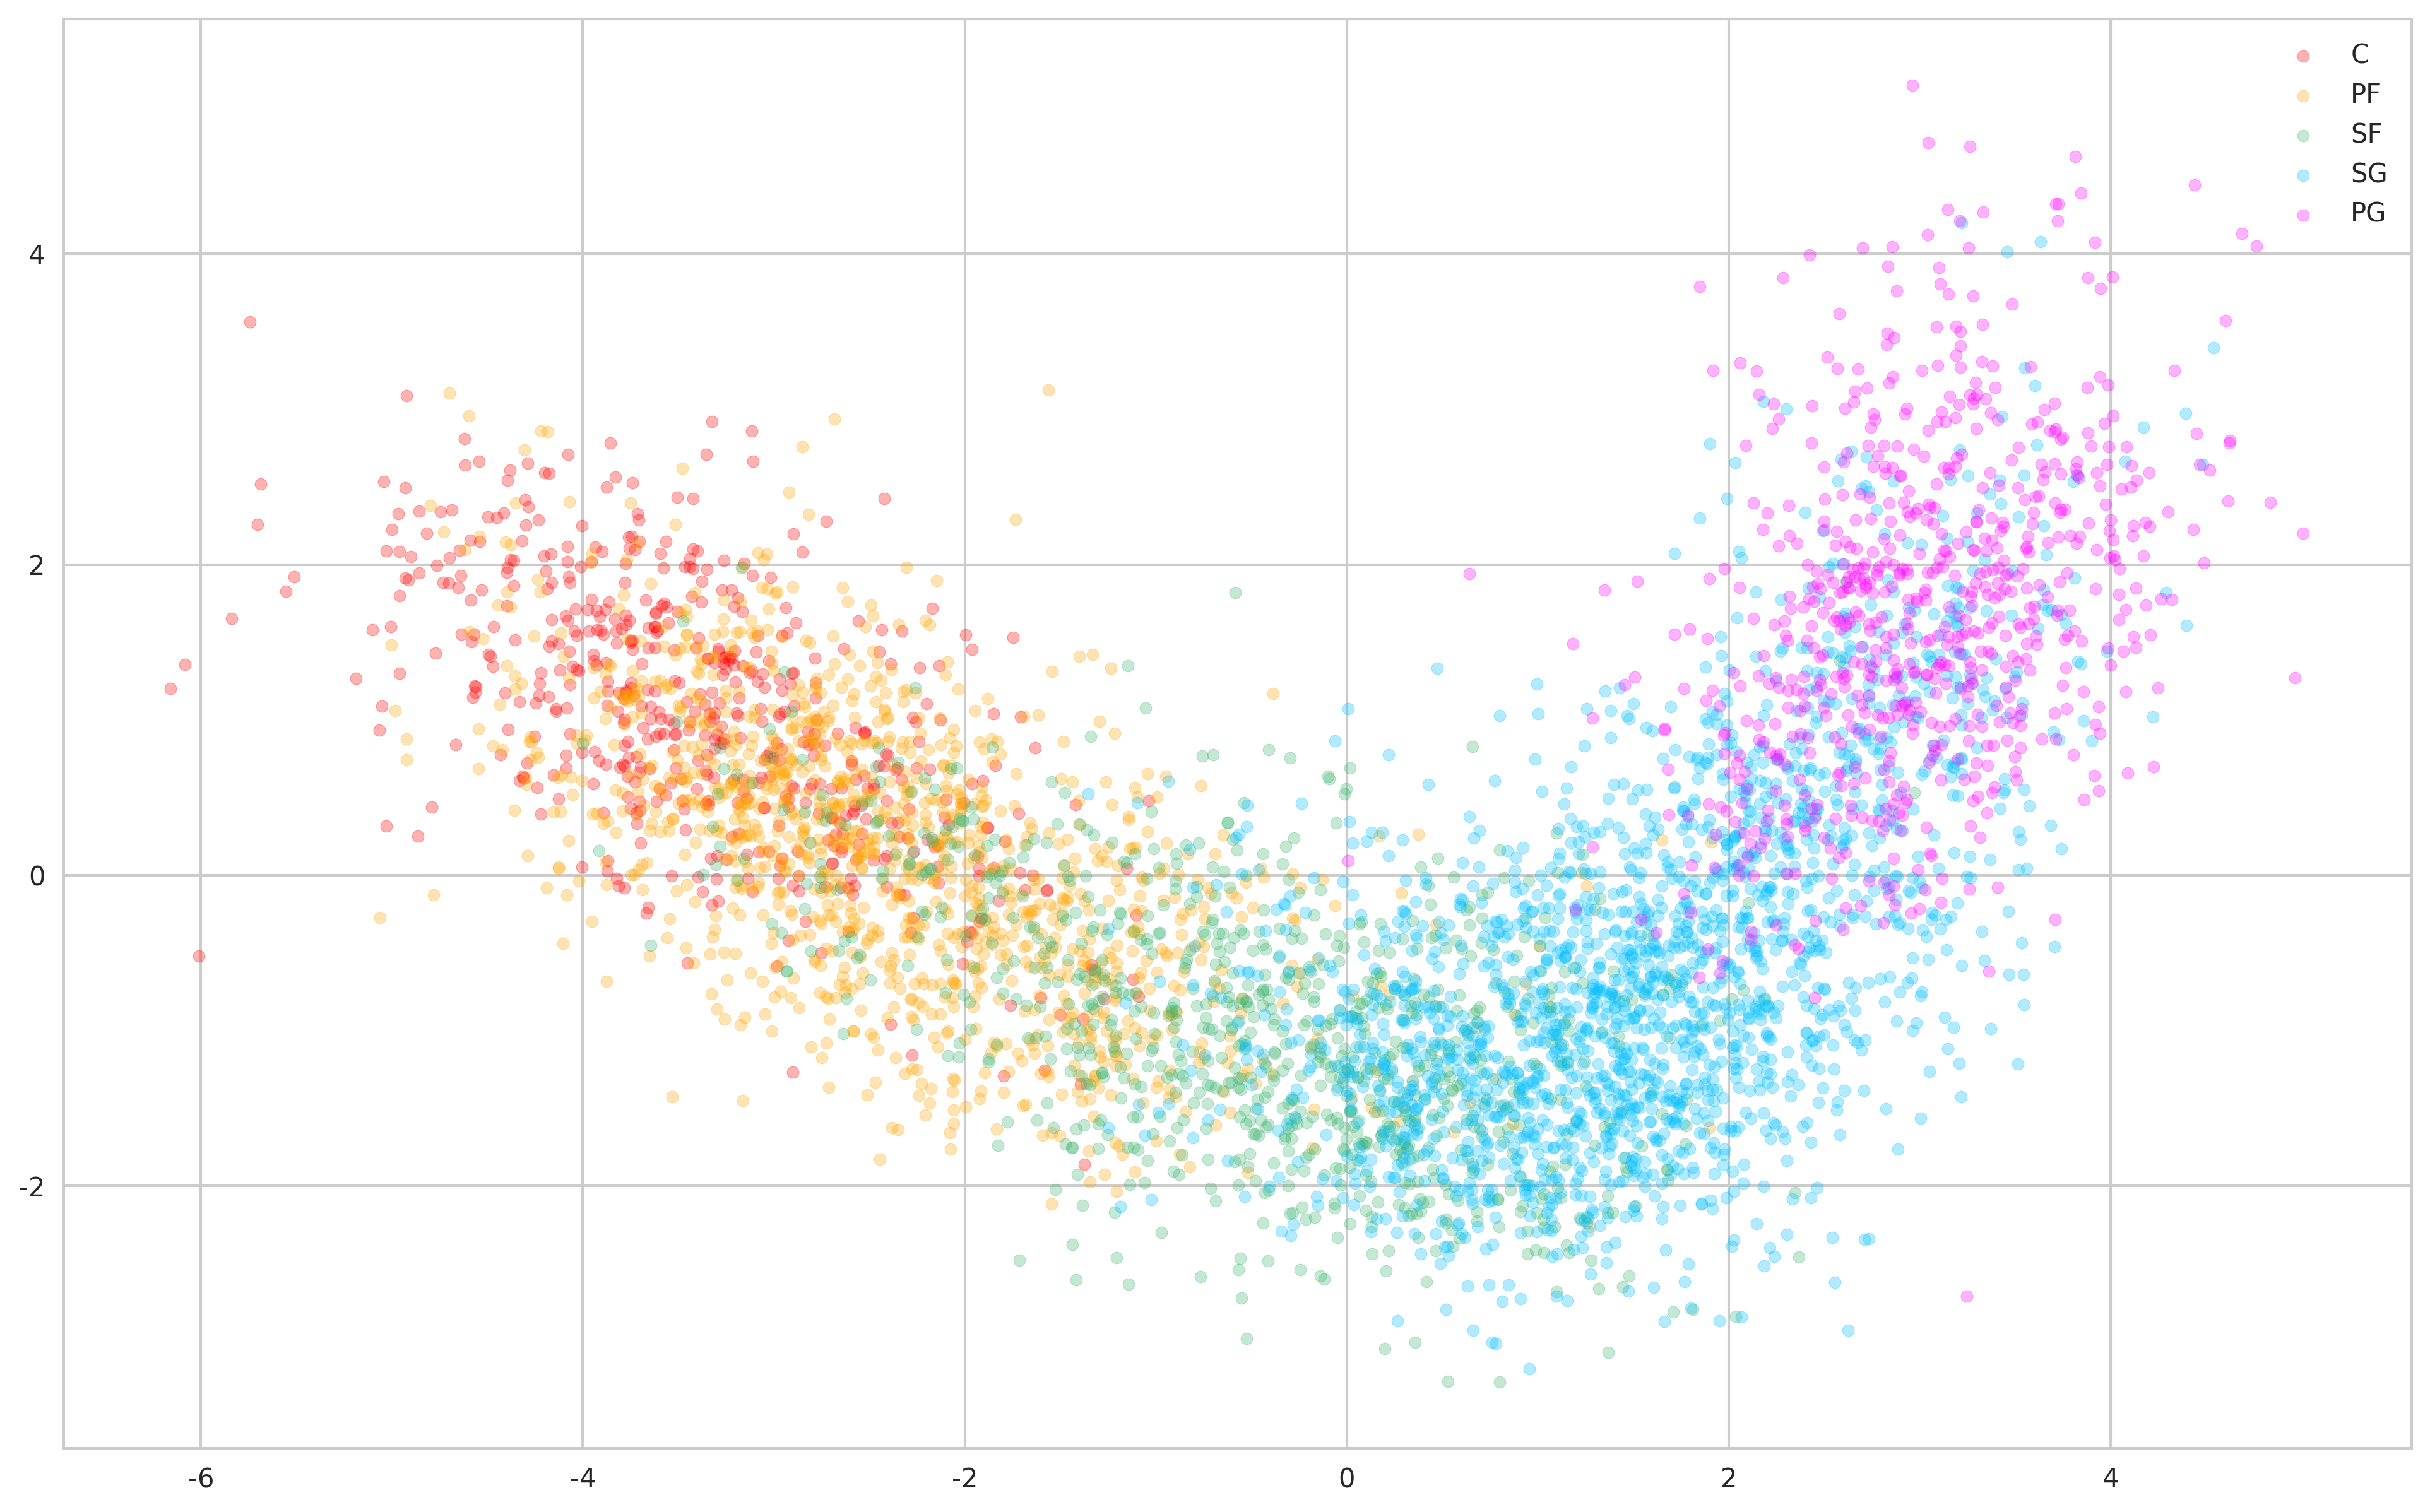

In [223]:
plt.figure(figsize=(16,10),dpi=300)
plt.scatter(ldaDf[ldaDf["pos"]=="C"].iloc[:,0], ldaDf[ldaDf["pos"]=="C"].iloc[:,1], color="red", marker="o", s=20, alpha=0.3, label="C")
plt.scatter(ldaDf[ldaDf["pos"]=="PF"].iloc[:,0], ldaDf[ldaDf["pos"]=="PF"].iloc[:,1], color="orange", marker="o", s=20, alpha=0.3, label="PF")
plt.scatter(ldaDf[ldaDf["pos"]=="SF"].iloc[:,0], ldaDf[ldaDf["pos"]=="SF"].iloc[:,1], color="mediumseagreen", marker="o", s=20, alpha=0.3, label="SF")
plt.scatter(ldaDf[ldaDf["pos"]=="SG"].iloc[:,0], ldaDf[ldaDf["pos"]=="SG"].iloc[:,1], color="deepskyblue", marker="o", s=20, alpha=0.3, label="SG")
plt.scatter(ldaDf[ldaDf["pos"]=="PG"].iloc[:,0], ldaDf[ldaDf["pos"]=="PG"].iloc[:,1], color="magenta", marker="o", s=20, alpha=0.3, label="PG")
plt.legend()
plt.show()

### 기존 포지션에 대한 실루엣 coefficient

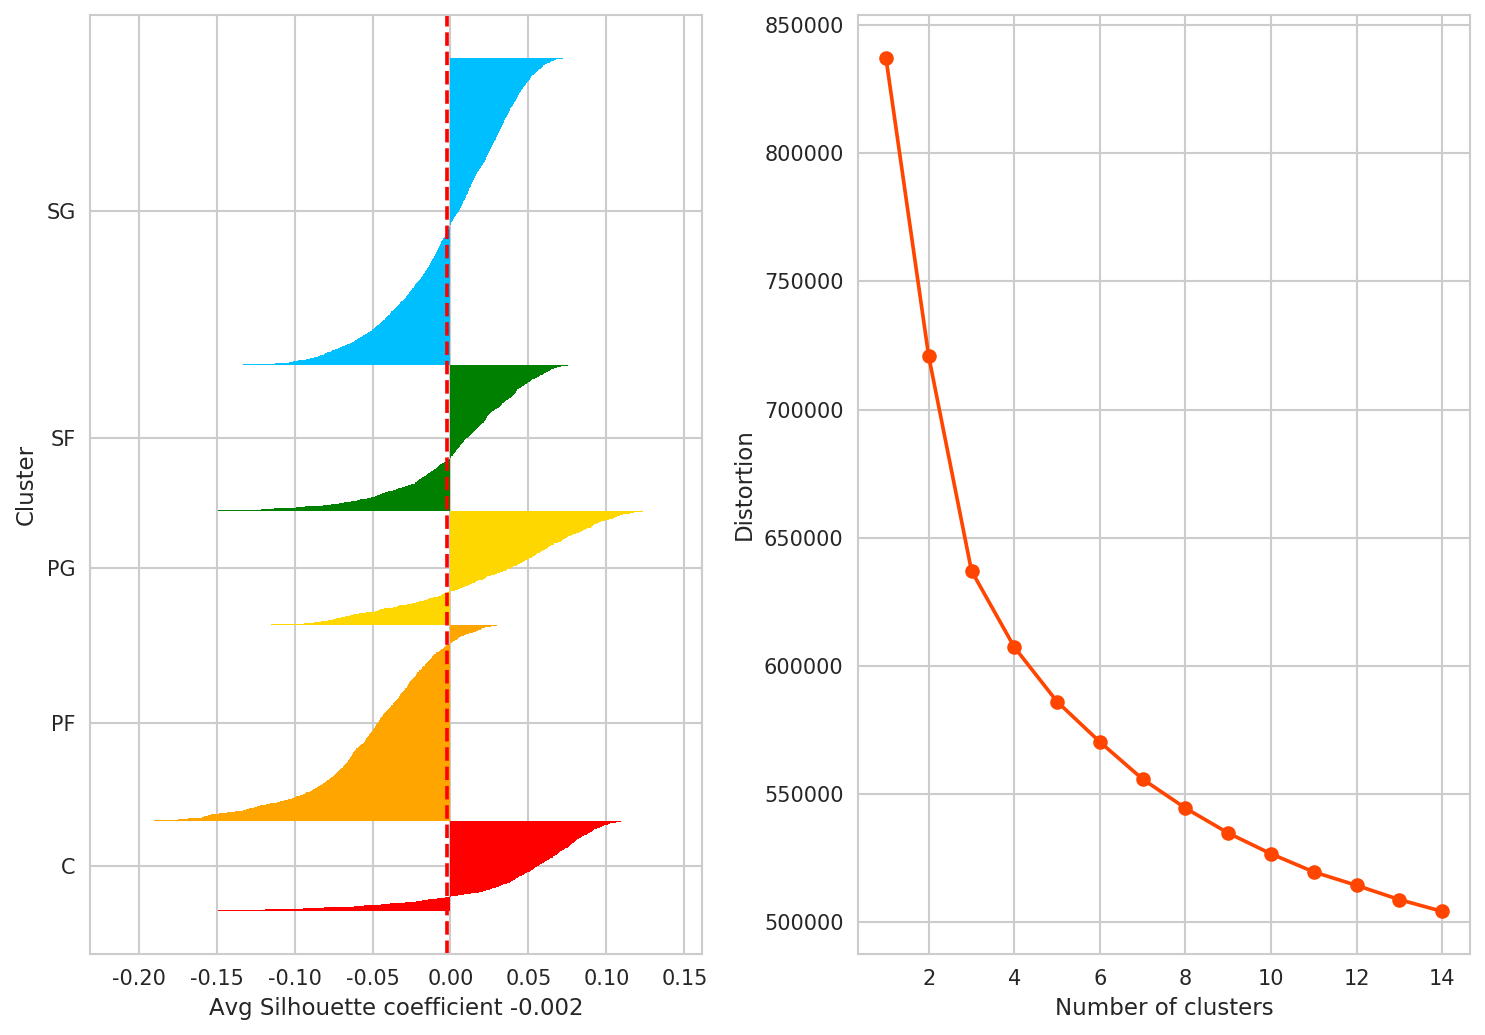

In [224]:
silhouette_plot(dfX, dfy)

## 10개로 포지션을 재정의한 후 시각화

In [225]:
del ldaDf["pos"]

In [226]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8, init="random", algorithm="full").fit(ldaDf)

In [227]:
model = model.predict(ldaDf)

In [228]:
ldaDf["cluster"] = model

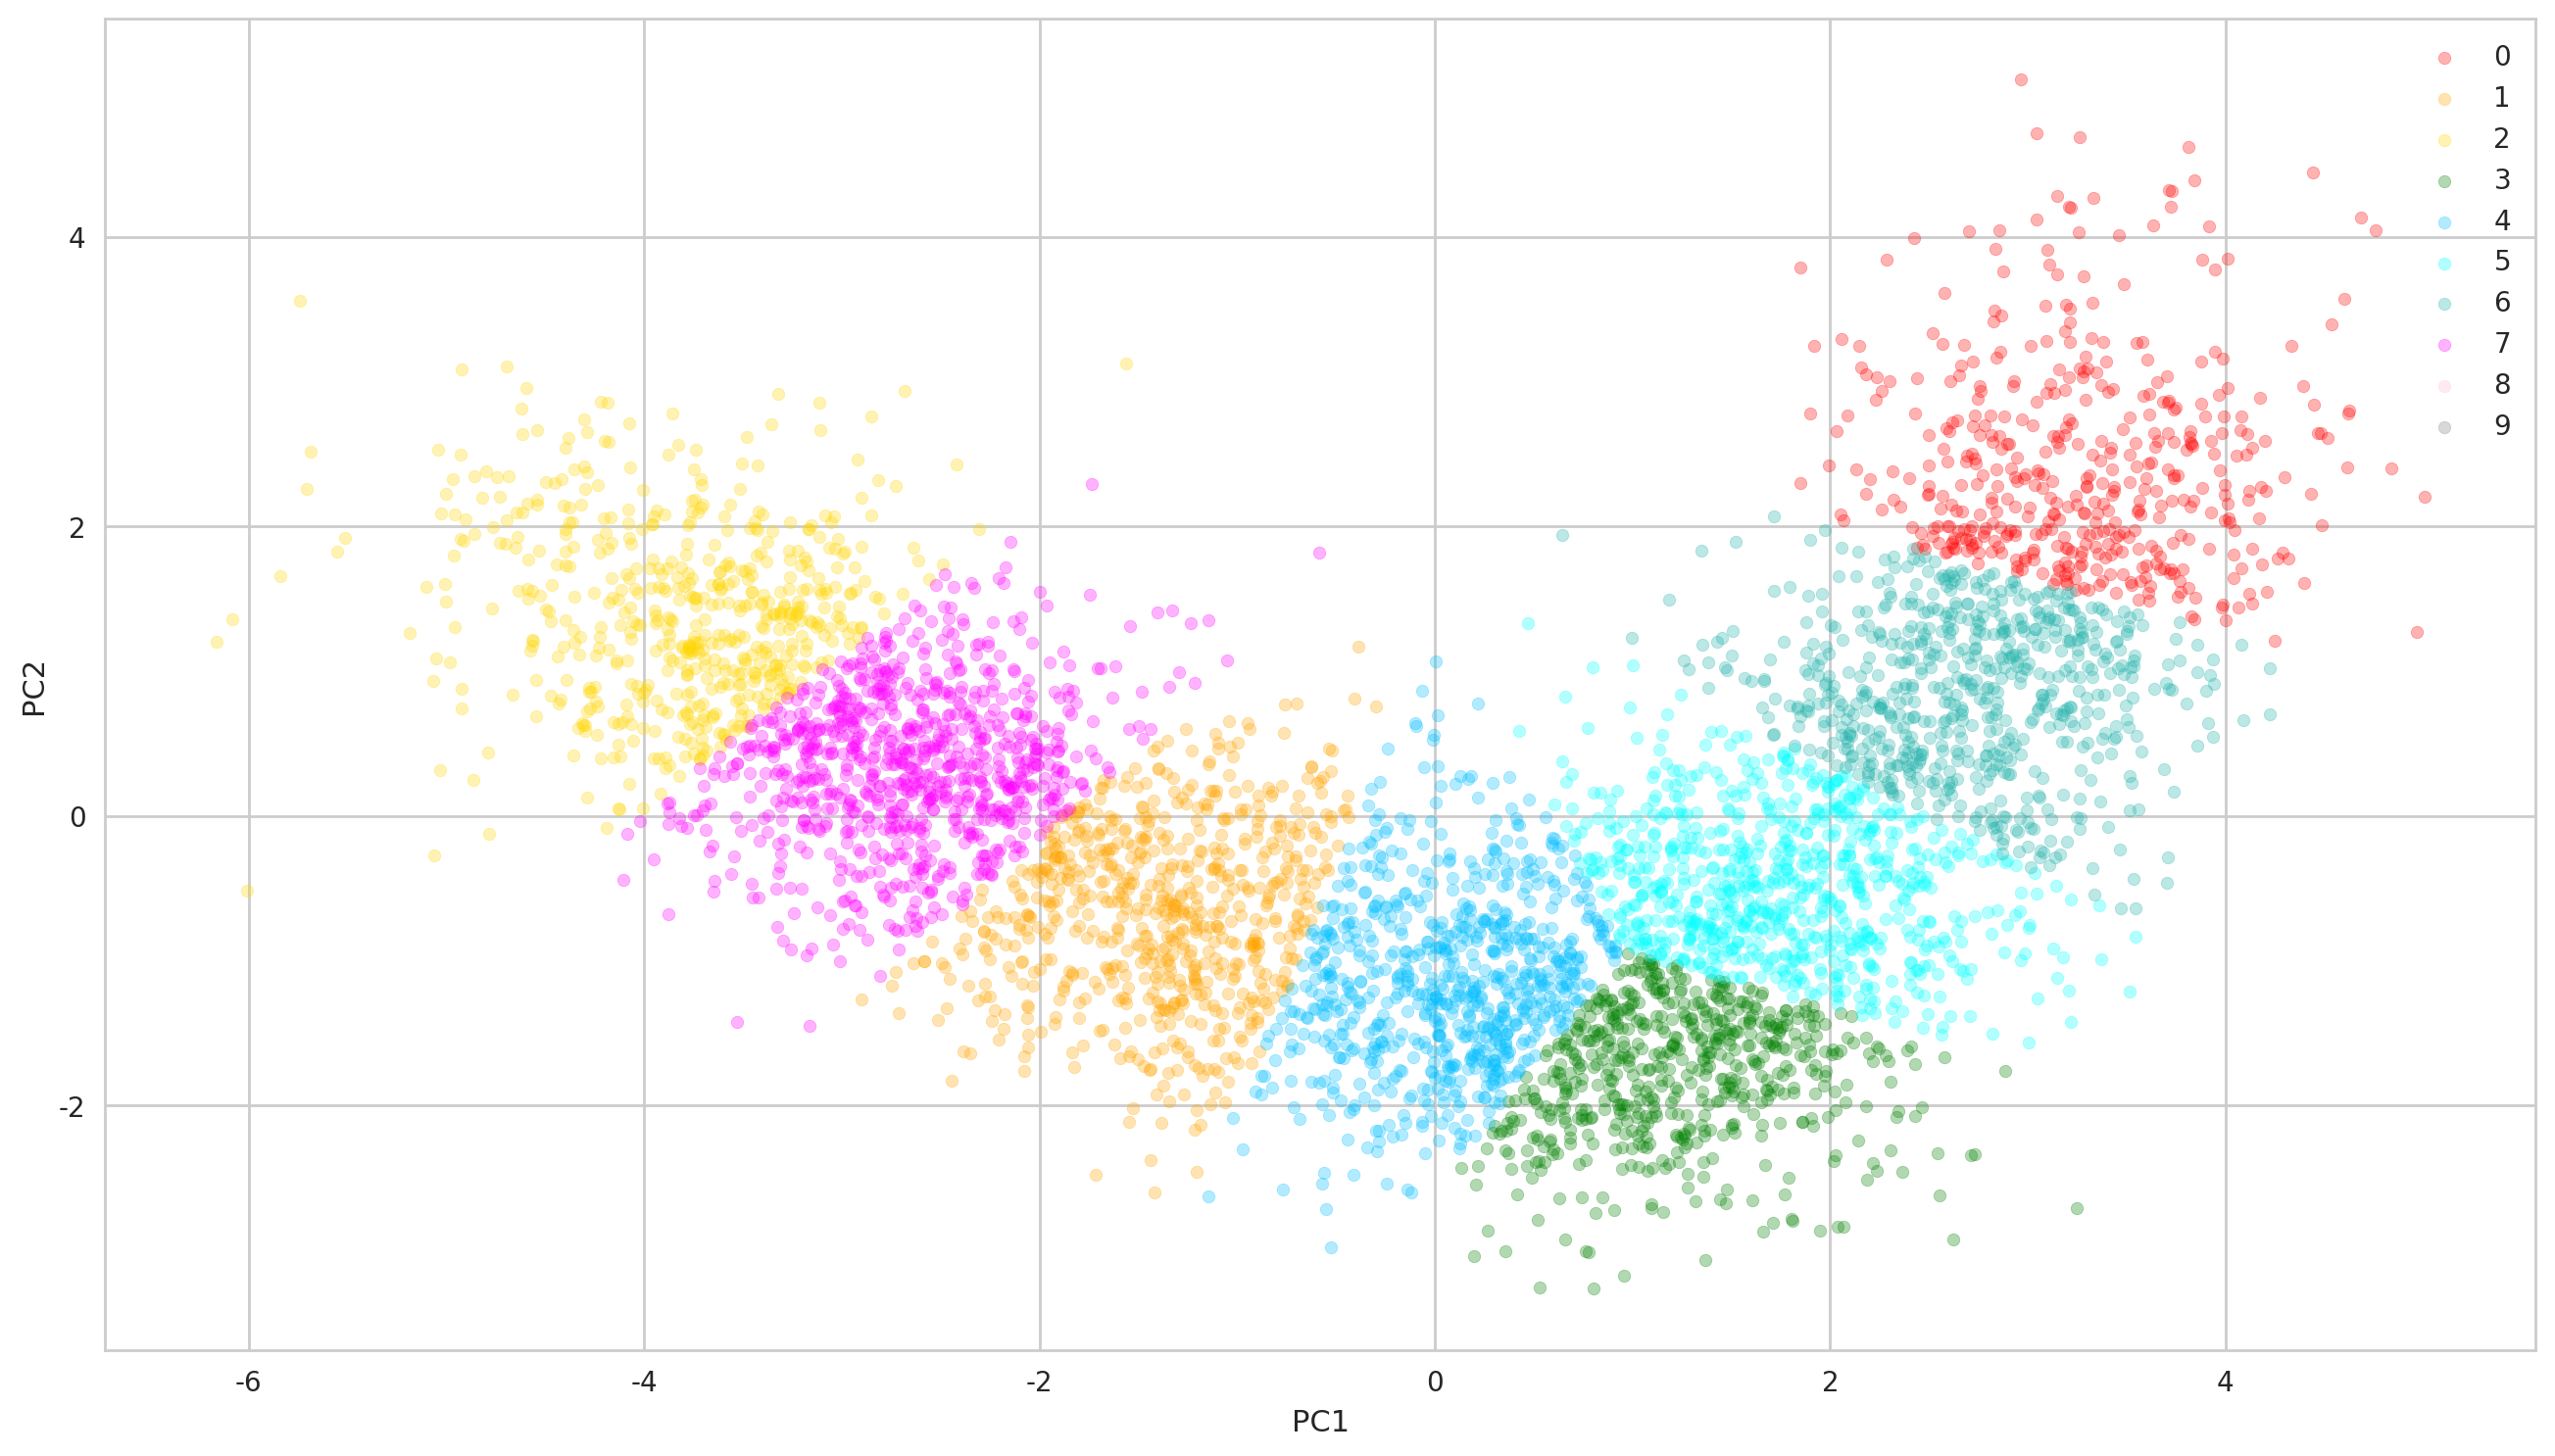

In [229]:
position_plot(ldaDf, 10)

### 재정의한 포지션에 대한 실루엣 coefficient

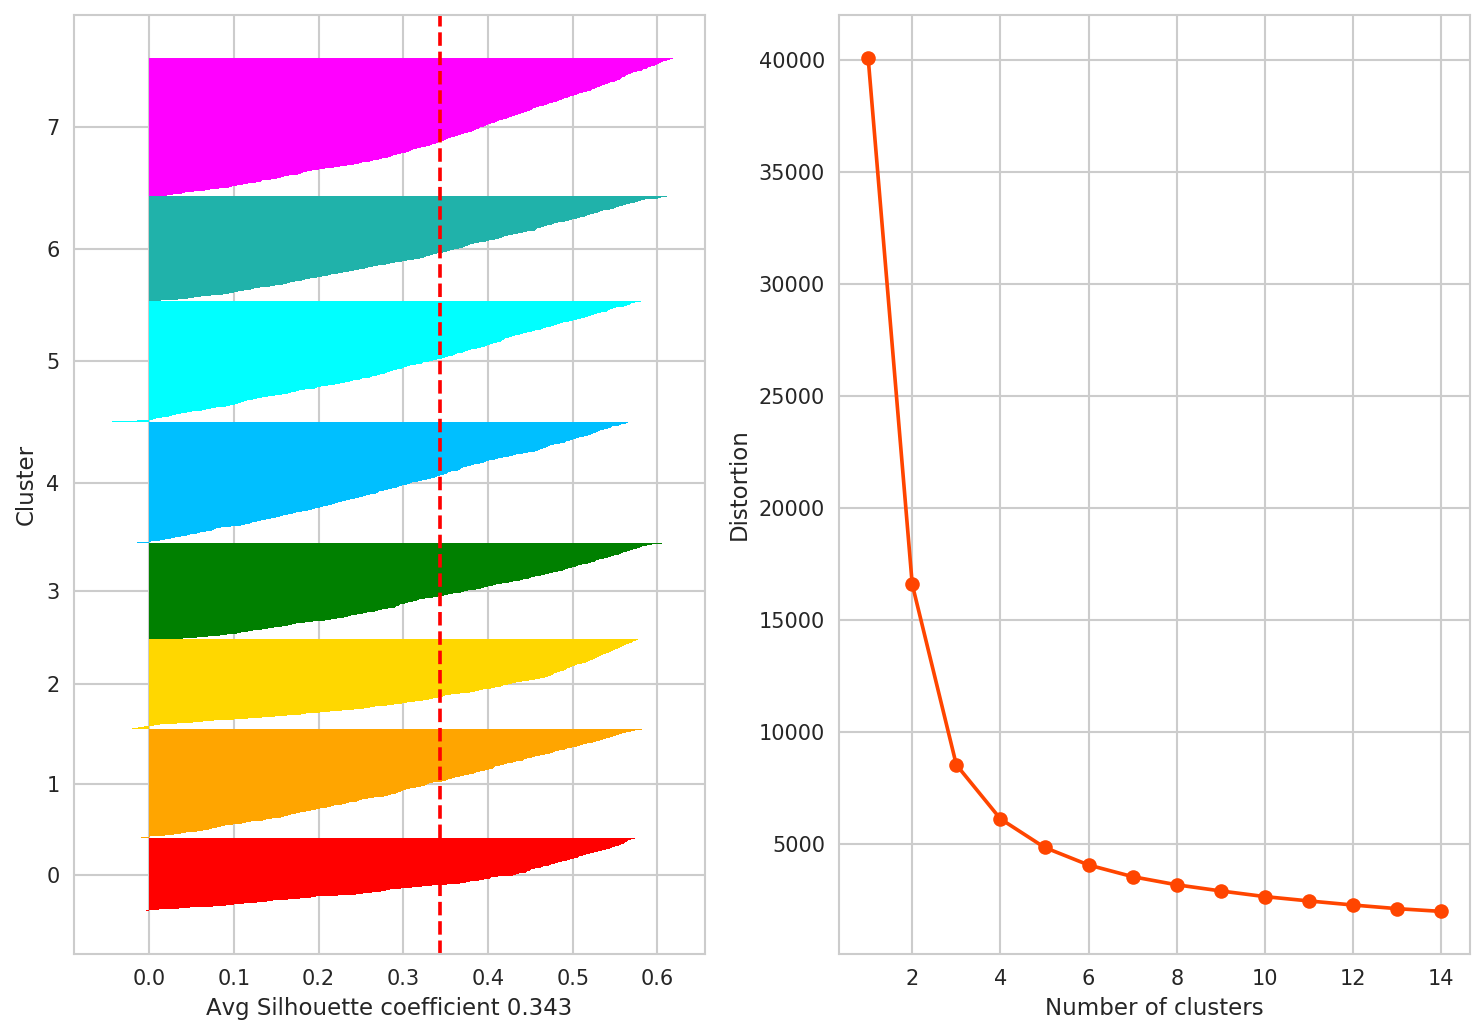

In [230]:
silhouette_plot(ldaDf.iloc[:,:2], model)

### 클러스터 특징 파악 

In [231]:
ldaDf["cluster"].value_counts()

7    880
4    771
5    769
1    694
6    666
3    610
2    570
0    464
Name: cluster, dtype: int64

In [232]:
dfX["cluster"] = ldaDf["cluster"]

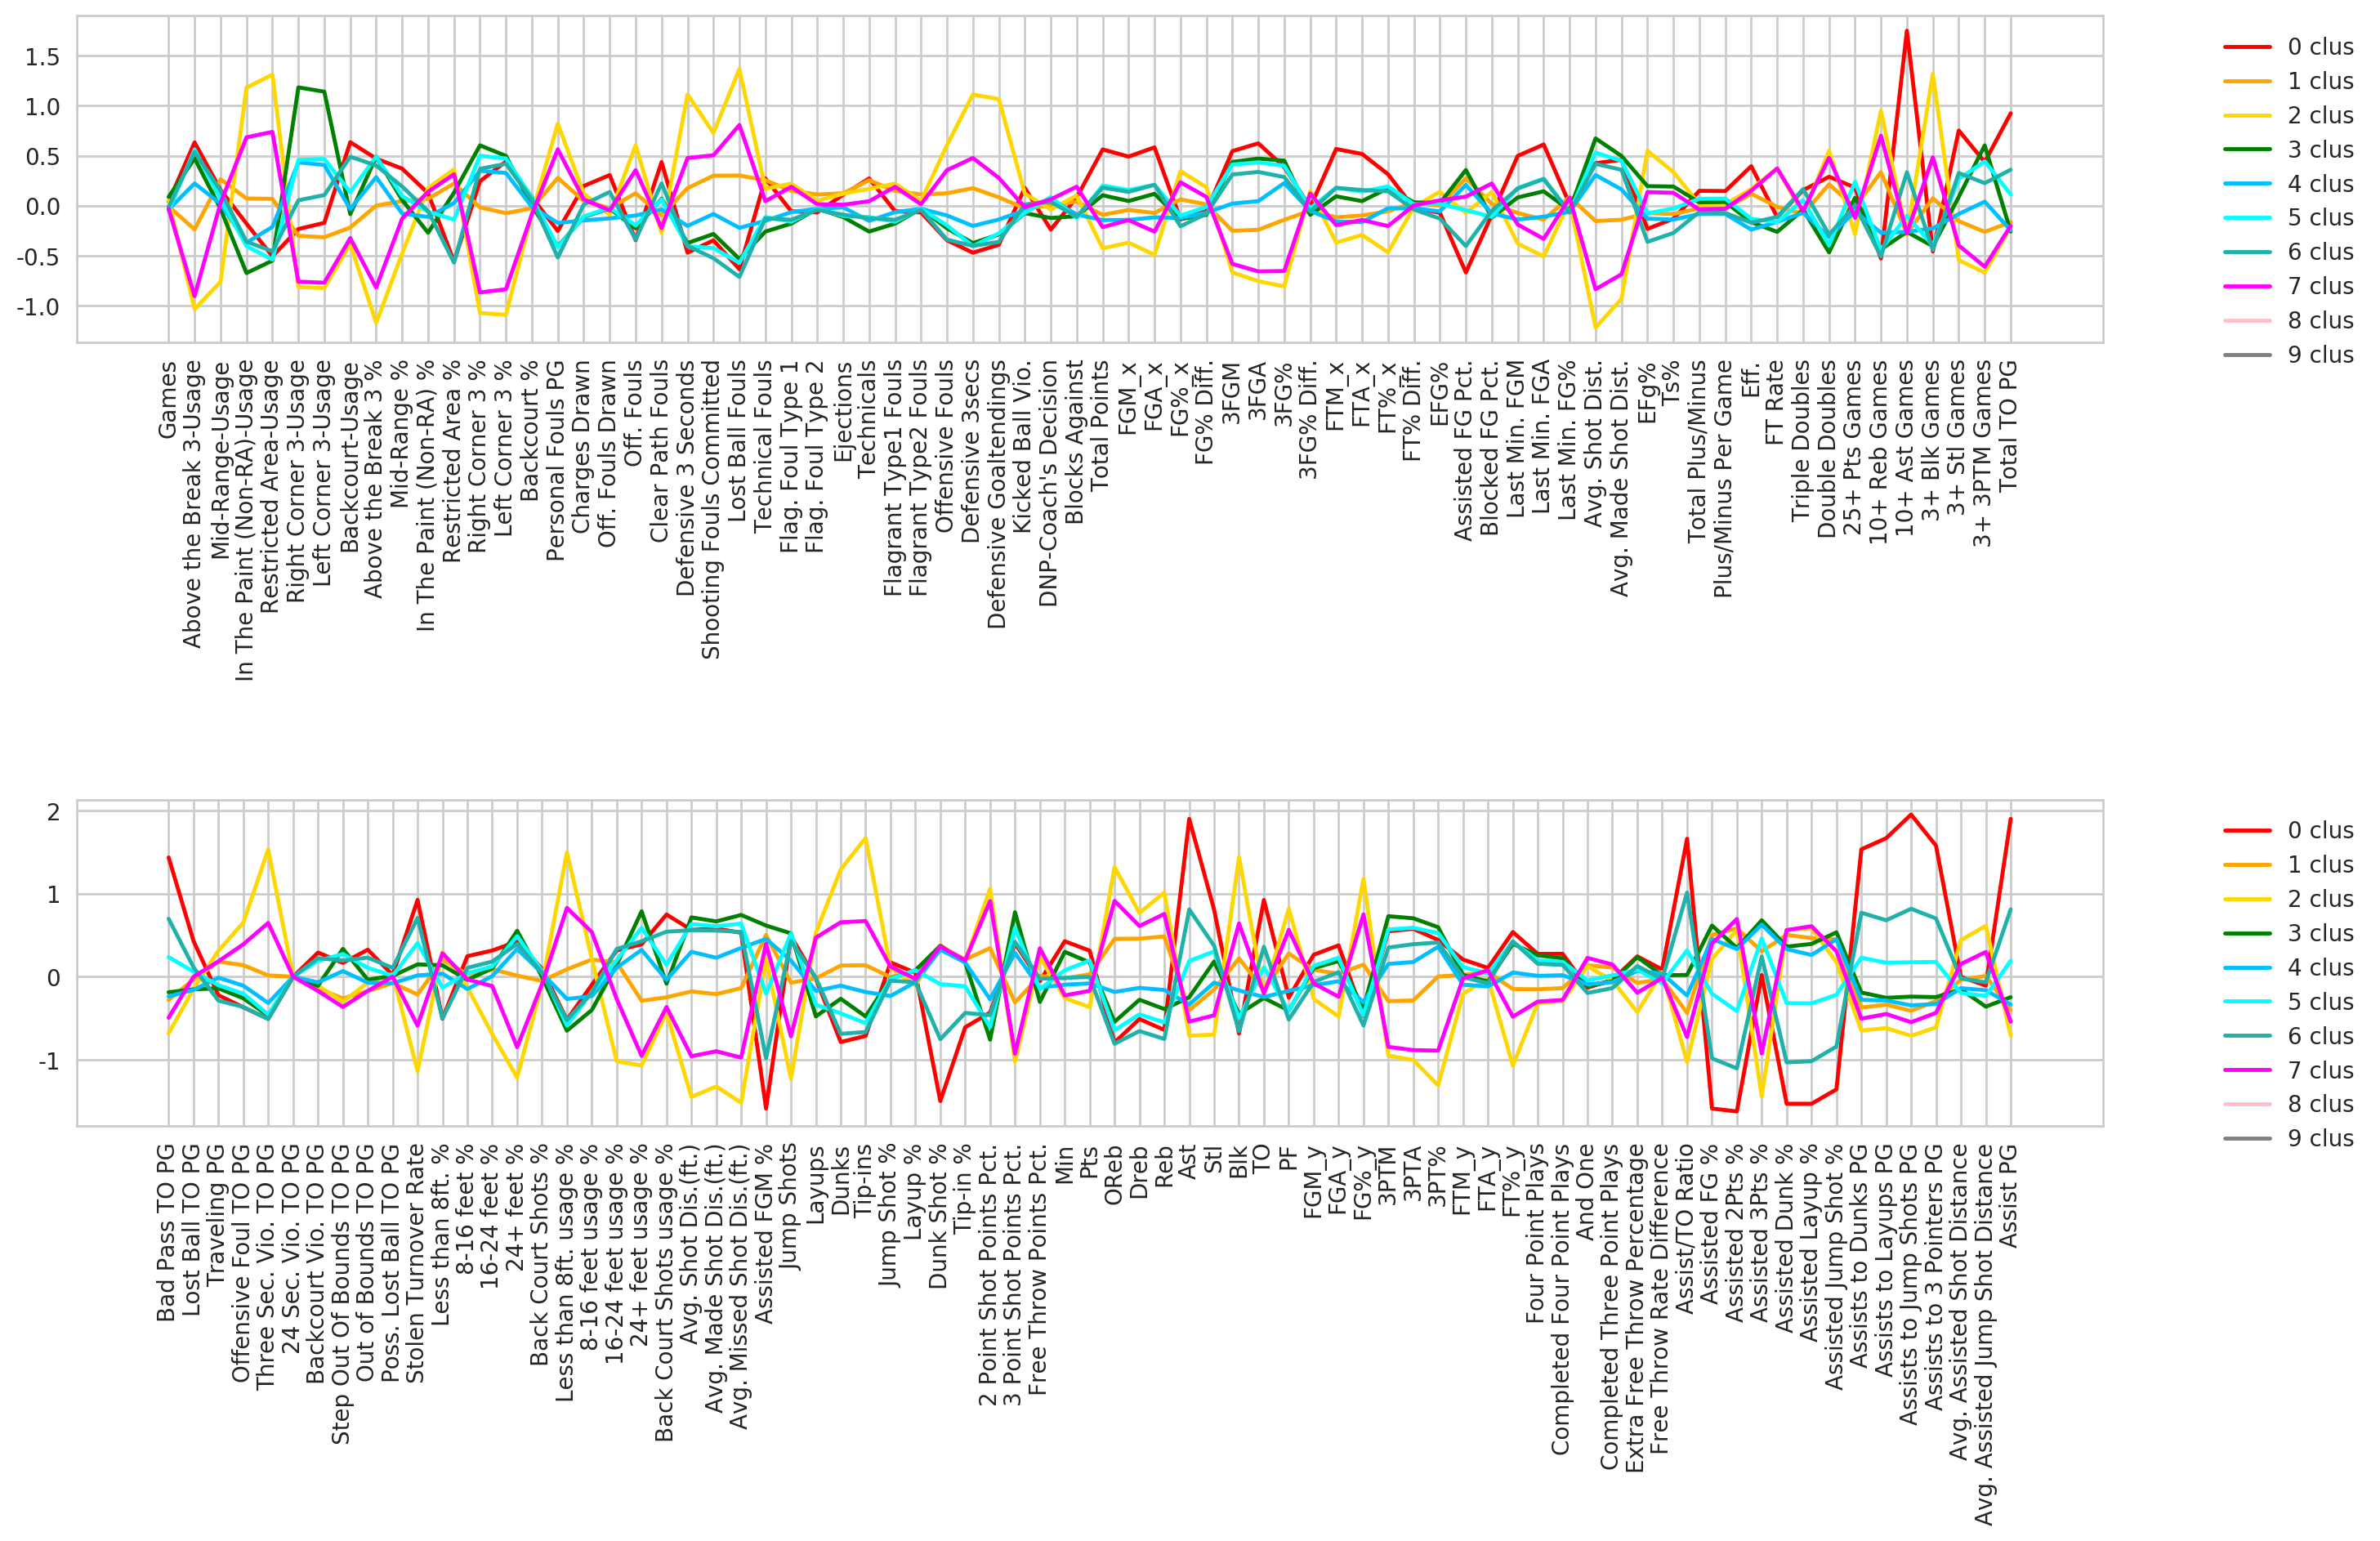

In [233]:
cluster_plot(dfX, 10)

### 클러스터링 모형 최적화 

In [118]:
from sklearn.model_selection import GridSearchCV 

def silhouette_score(estimator, X):
    from sklearn.metrics import silhouette_samples   
    
    clusters = estimator.fit_predict(X)
    silhouette_vals = silhouette_samples(X, clusters, metric="euclidean")
    score = np.mean(silhouette_vals)
    return score

kms = KMeans()
param_init = ["k-means++", "random"]
param_algo = ["auto", "full"]
param_grid = {"n_clusters": range(8, 15), "init" : param_init, "algorithm" : param_algo}

gs = GridSearchCV(kms, param_grid = param_grid, scoring=silhouette_score, n_jobs=1)
X = ldaDf.iloc[:,:2]
gs.fit(X)

GridSearchCV(cv=None, error_score='raise',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'init': ['k-means++', 'random'], 'algorithm': ['auto', 'full'], 'n_clusters': [8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function silhouette_score at 0x1177d8e60>, verbose=0)

In [119]:
gs.best_params_

{'algorithm': 'full', 'init': 'random', 'n_clusters': 8}

In [120]:
gs.best_score_

0.35172912319132343

In [121]:
n = len(gs.cv_results_["mean_test_score"])
for i in range(n):
    print(gs.cv_results_["params"][i] , " --- " , gs.cv_results_["mean_test_score"][i])

{'init': 'k-means++', 'n_clusters': 8, 'algorithm': 'auto'}  ---  0.351692536496
{'init': 'k-means++', 'n_clusters': 9, 'algorithm': 'auto'}  ---  0.341852248516
{'init': 'k-means++', 'n_clusters': 10, 'algorithm': 'auto'}  ---  0.341706765879
{'init': 'k-means++', 'n_clusters': 11, 'algorithm': 'auto'}  ---  0.335540374482
{'init': 'k-means++', 'n_clusters': 12, 'algorithm': 'auto'}  ---  0.328219023174
{'init': 'k-means++', 'n_clusters': 13, 'algorithm': 'auto'}  ---  0.33141084461
{'init': 'k-means++', 'n_clusters': 14, 'algorithm': 'auto'}  ---  0.329887137084
{'init': 'random', 'n_clusters': 8, 'algorithm': 'auto'}  ---  0.351455863081
{'init': 'random', 'n_clusters': 9, 'algorithm': 'auto'}  ---  0.339467426731
{'init': 'random', 'n_clusters': 10, 'algorithm': 'auto'}  ---  0.336864791087
{'init': 'random', 'n_clusters': 11, 'algorithm': 'auto'}  ---  0.336741339329
{'init': 'random', 'n_clusters': 12, 'algorithm': 'auto'}  ---  0.329059038696
{'init': 'random', 'n_clusters': 13,

--------

---------

# 덴드로그램

In [ ]:
clusDf = ldaDf.iloc[:,:2]

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

row_clusters = linkage(pdist(clusDf, metric="euclidean"), method="complete")

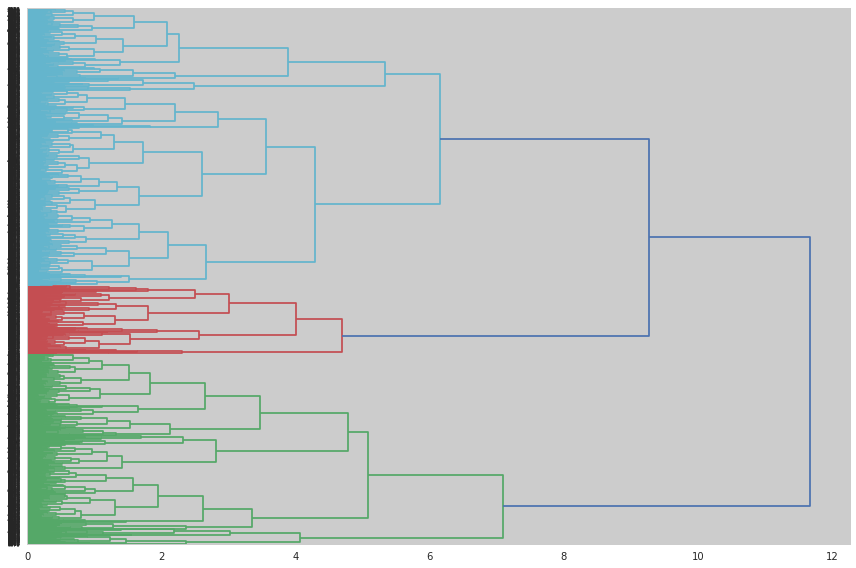

In [36]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(5,15), labels=ldaDf["dfy"])
dendrogram(row_clusters, orientation="right")
plt.tight_layout()
plt.show()

# affinity propagation

In [48]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [217]:
af = AffinityPropagation(preference=-5).fit(clusDf)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(clusDf, labels, metric='euclidean'))

Estimated number of clusters: 572


# EM clustering

In [196]:
clusDf = ldaDf.iloc[:,:2]

In [182]:
from sklearn import mixture
import pandas as pd

em = mixture.GMM(n_components=10)
y = em.fit_predict(clusDf) 

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(clusDf, y, metric='euclidean'))
silhouette_vals = silhouette_samples(clusDf, y, metric="euclidean")
silhouette_vals

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/

Silhouette Coefficient: 0.275


array([-0.12887175, -0.41249665,  0.1414683 , ...,  0.51789468,
        0.08089916,  0.27011646])

In [183]:
pd.Series(y).value_counts()

2    802
7    798
0    665
3    580
9    580
6    554
4    553
5    486
1    337
8     69
dtype: int64

In [184]:
ldaDf["cluster"] = y

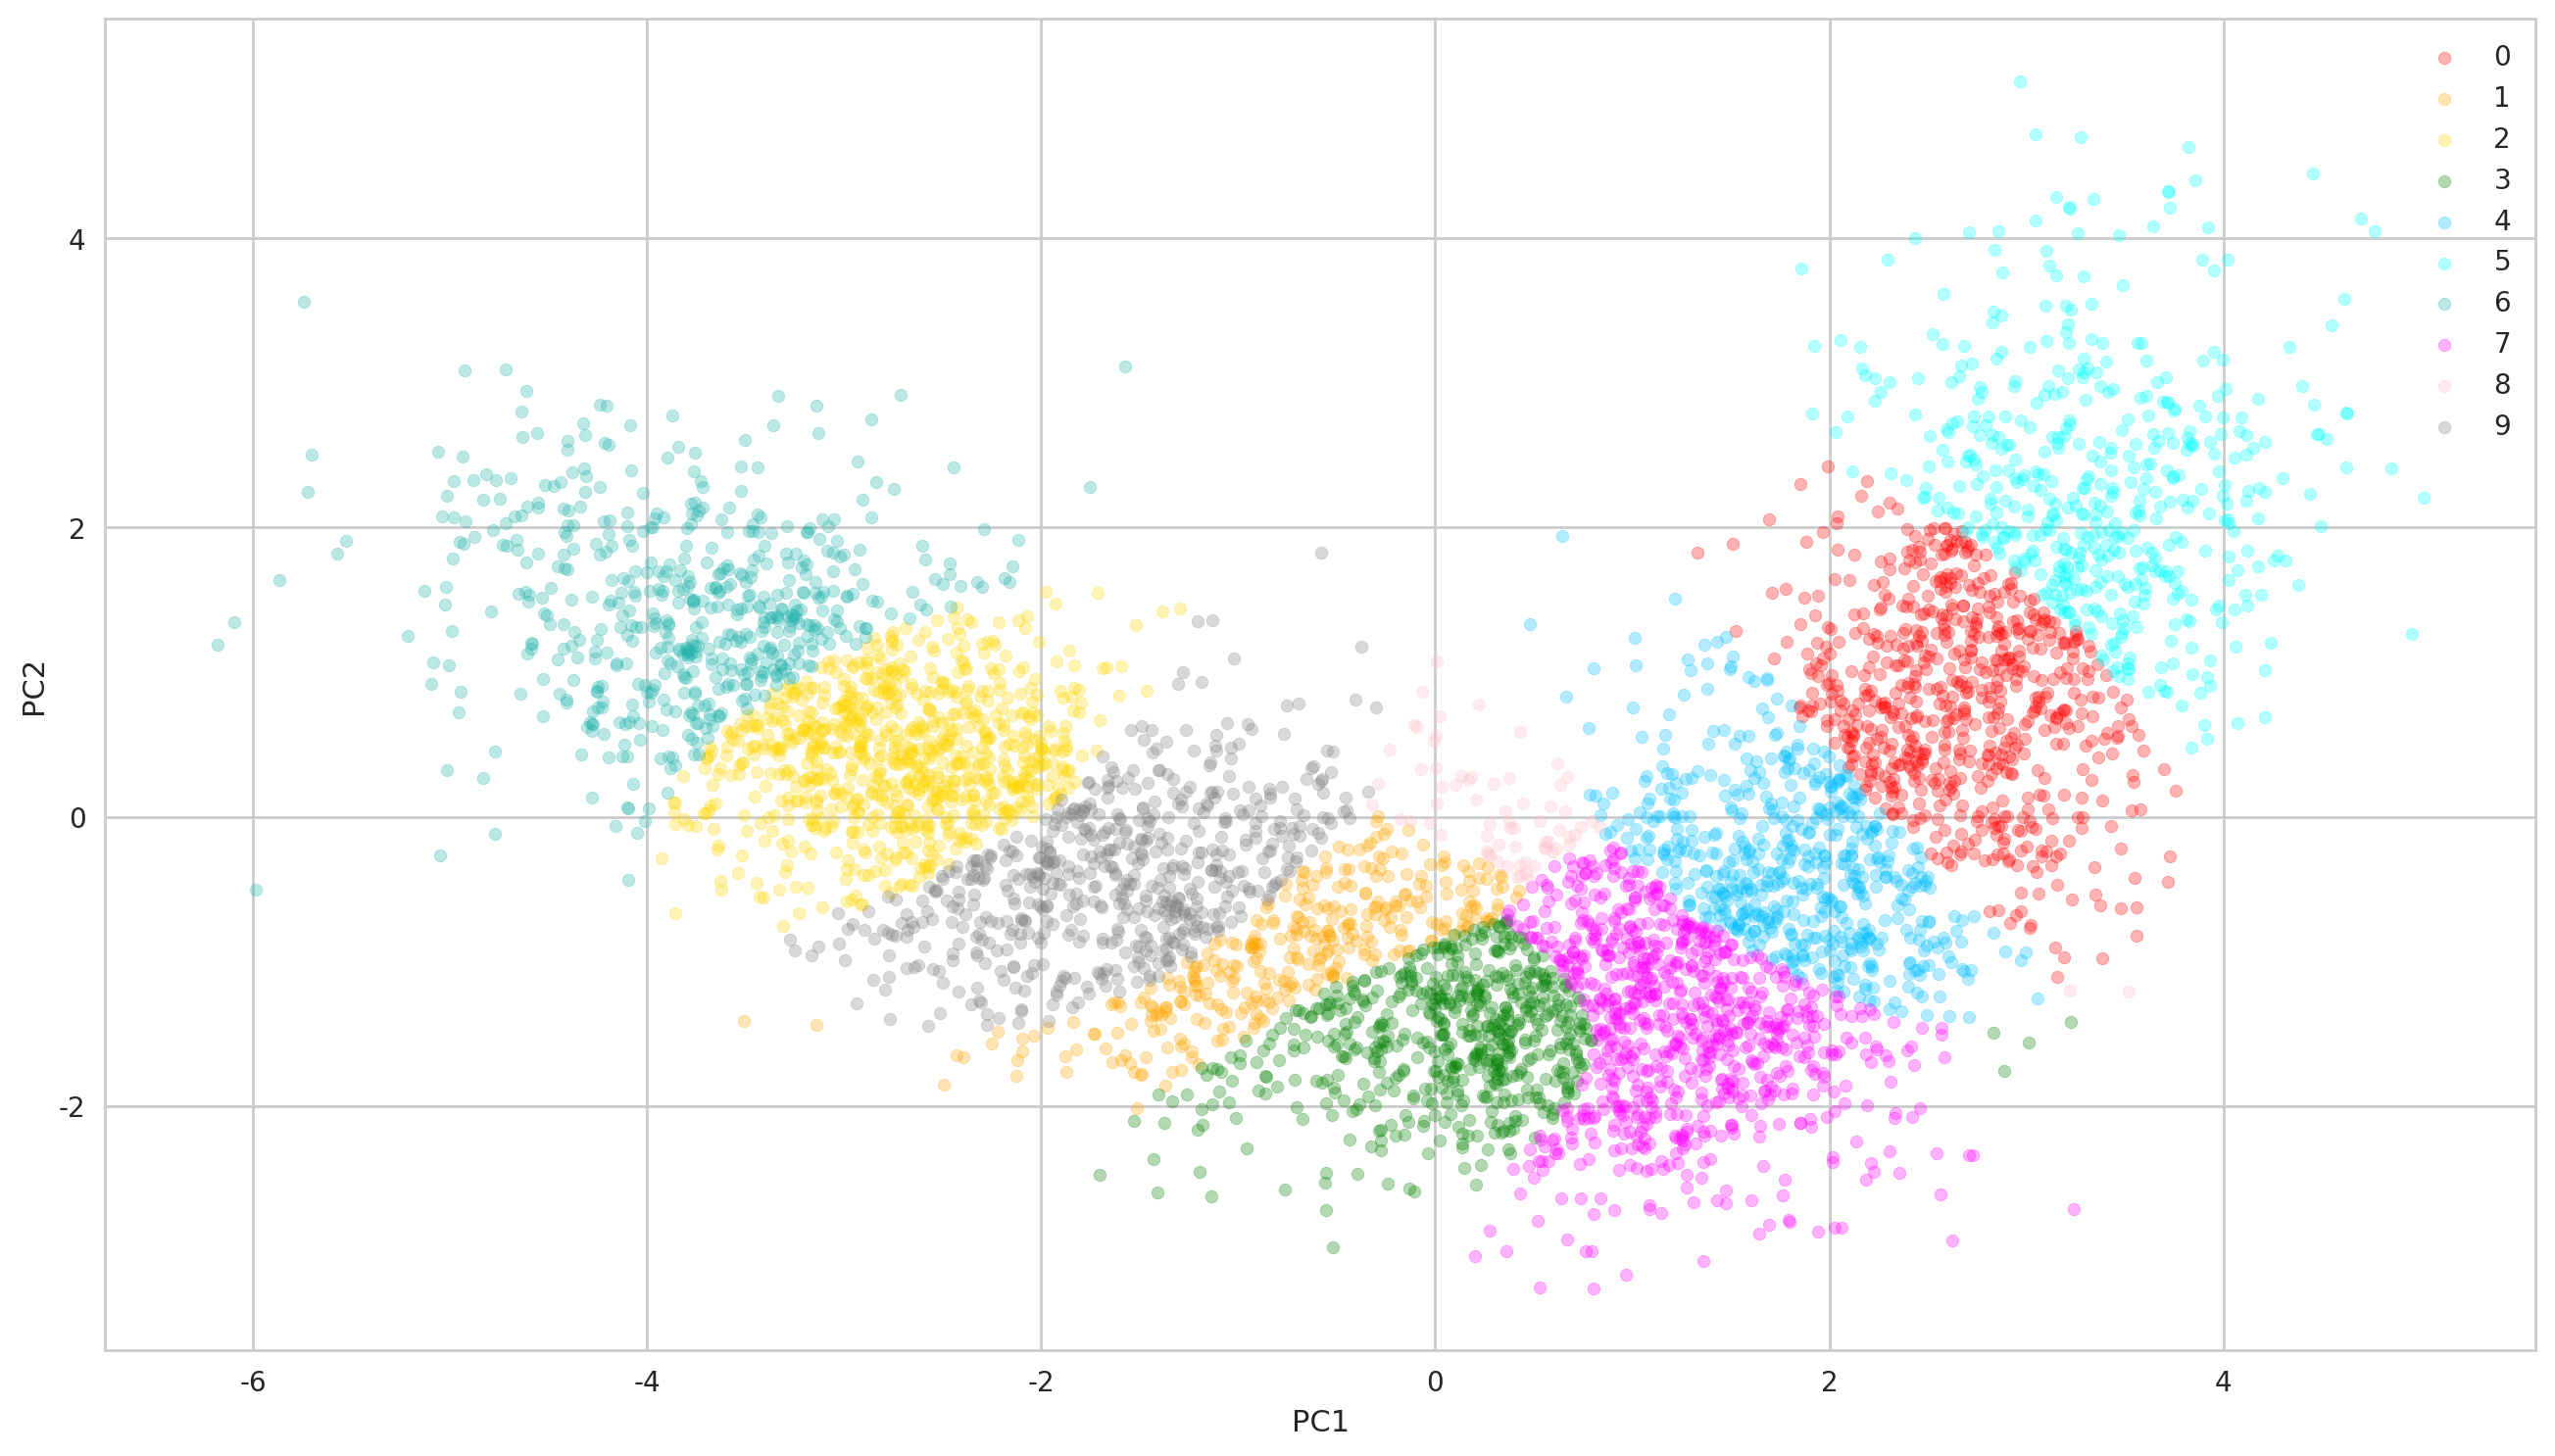

In [185]:
position_plot(ldaDf, 10)

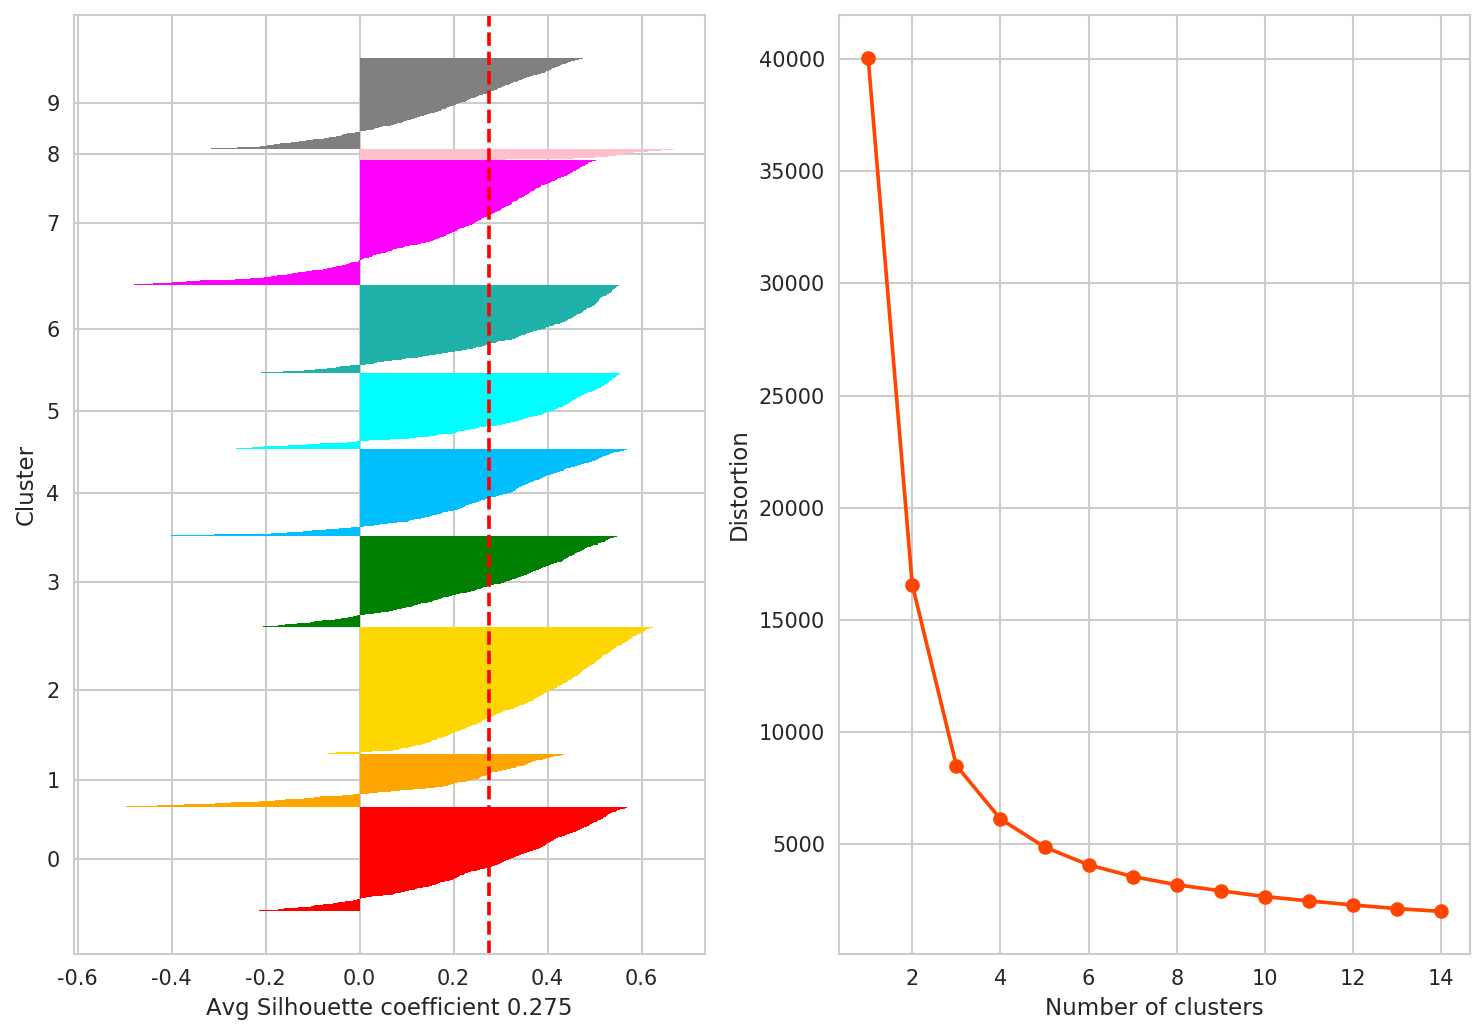

In [186]:
silhouette_plot(ldaDf.iloc[:,:2], ldaDf["cluster"])

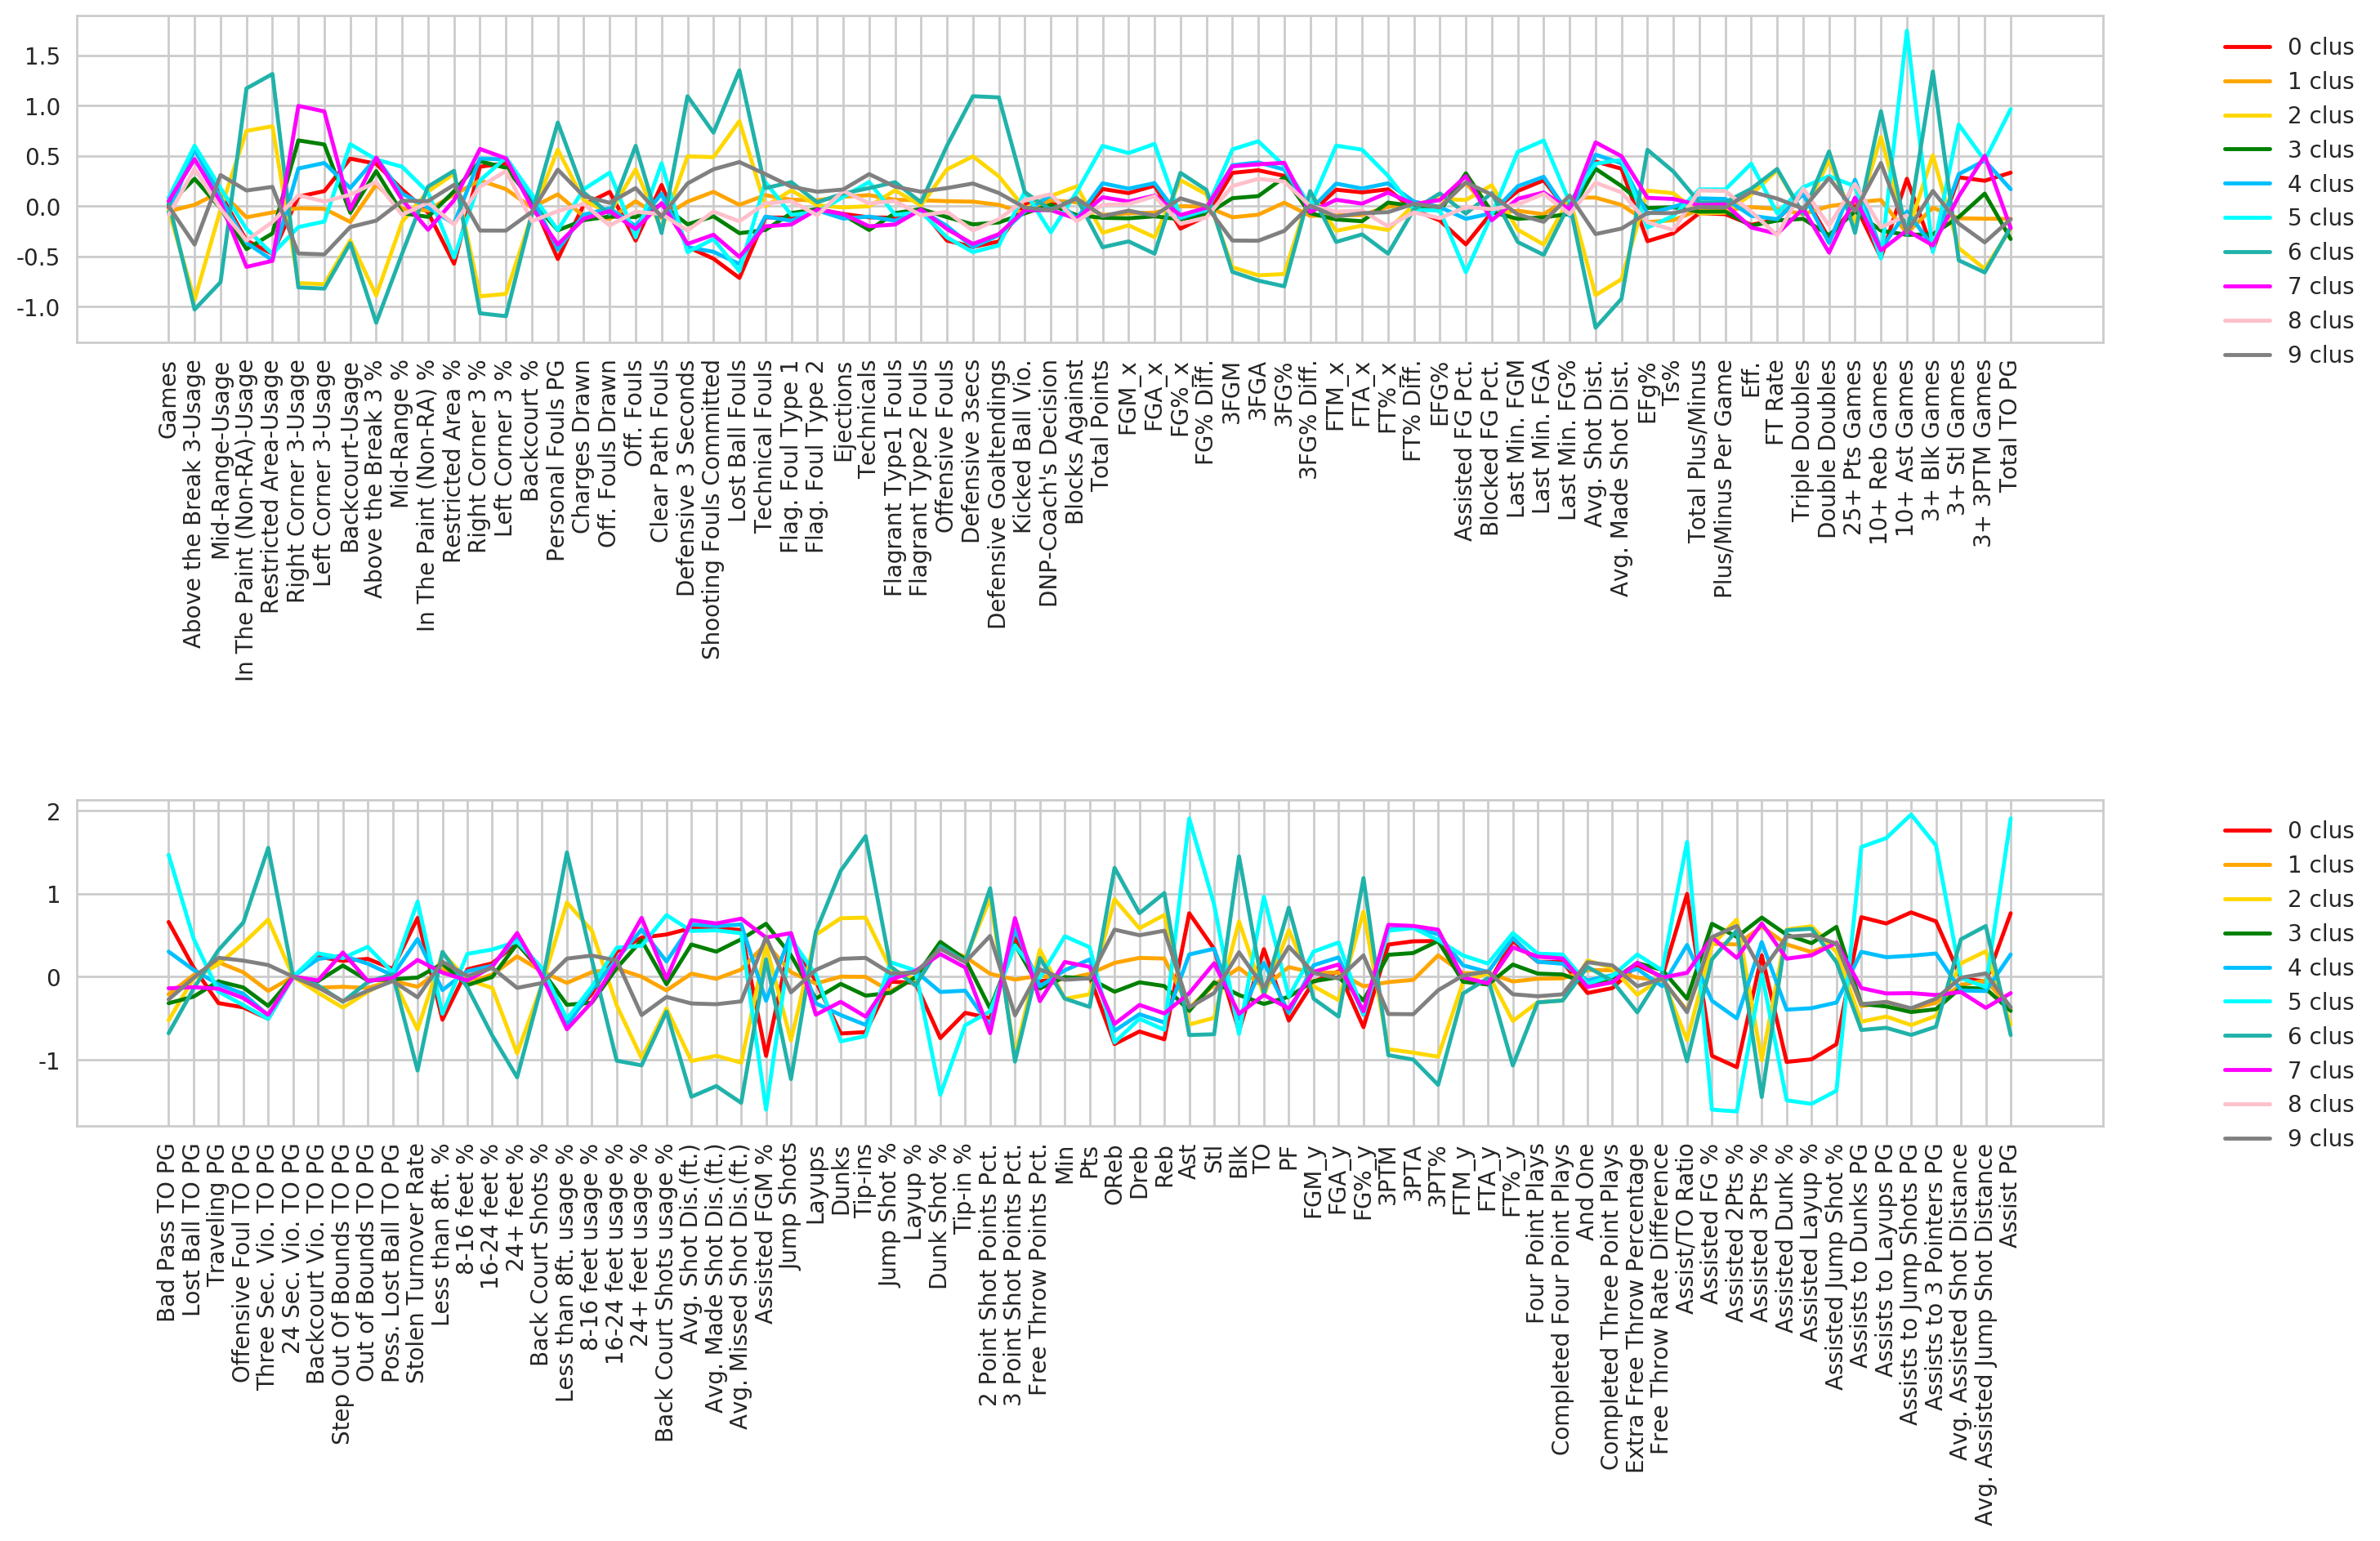

In [187]:
dfX["cluster"] = y
cluster_plot(dfX, 10)

--------

## 계층적 클러스터링

In [213]:
# 계층 클러스터링을 수행하고 군집의 개수를 선택할 수 있게 해준다. 
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=10, affinity="euclidean", linkage="ward")
labels = ac.fit_predict(clusDf)
print("Cluster labels : %s" %labels)

Cluster labels : [8 8 3 ..., 0 4 6]


In [214]:
ldaDf["cluster"] = labels

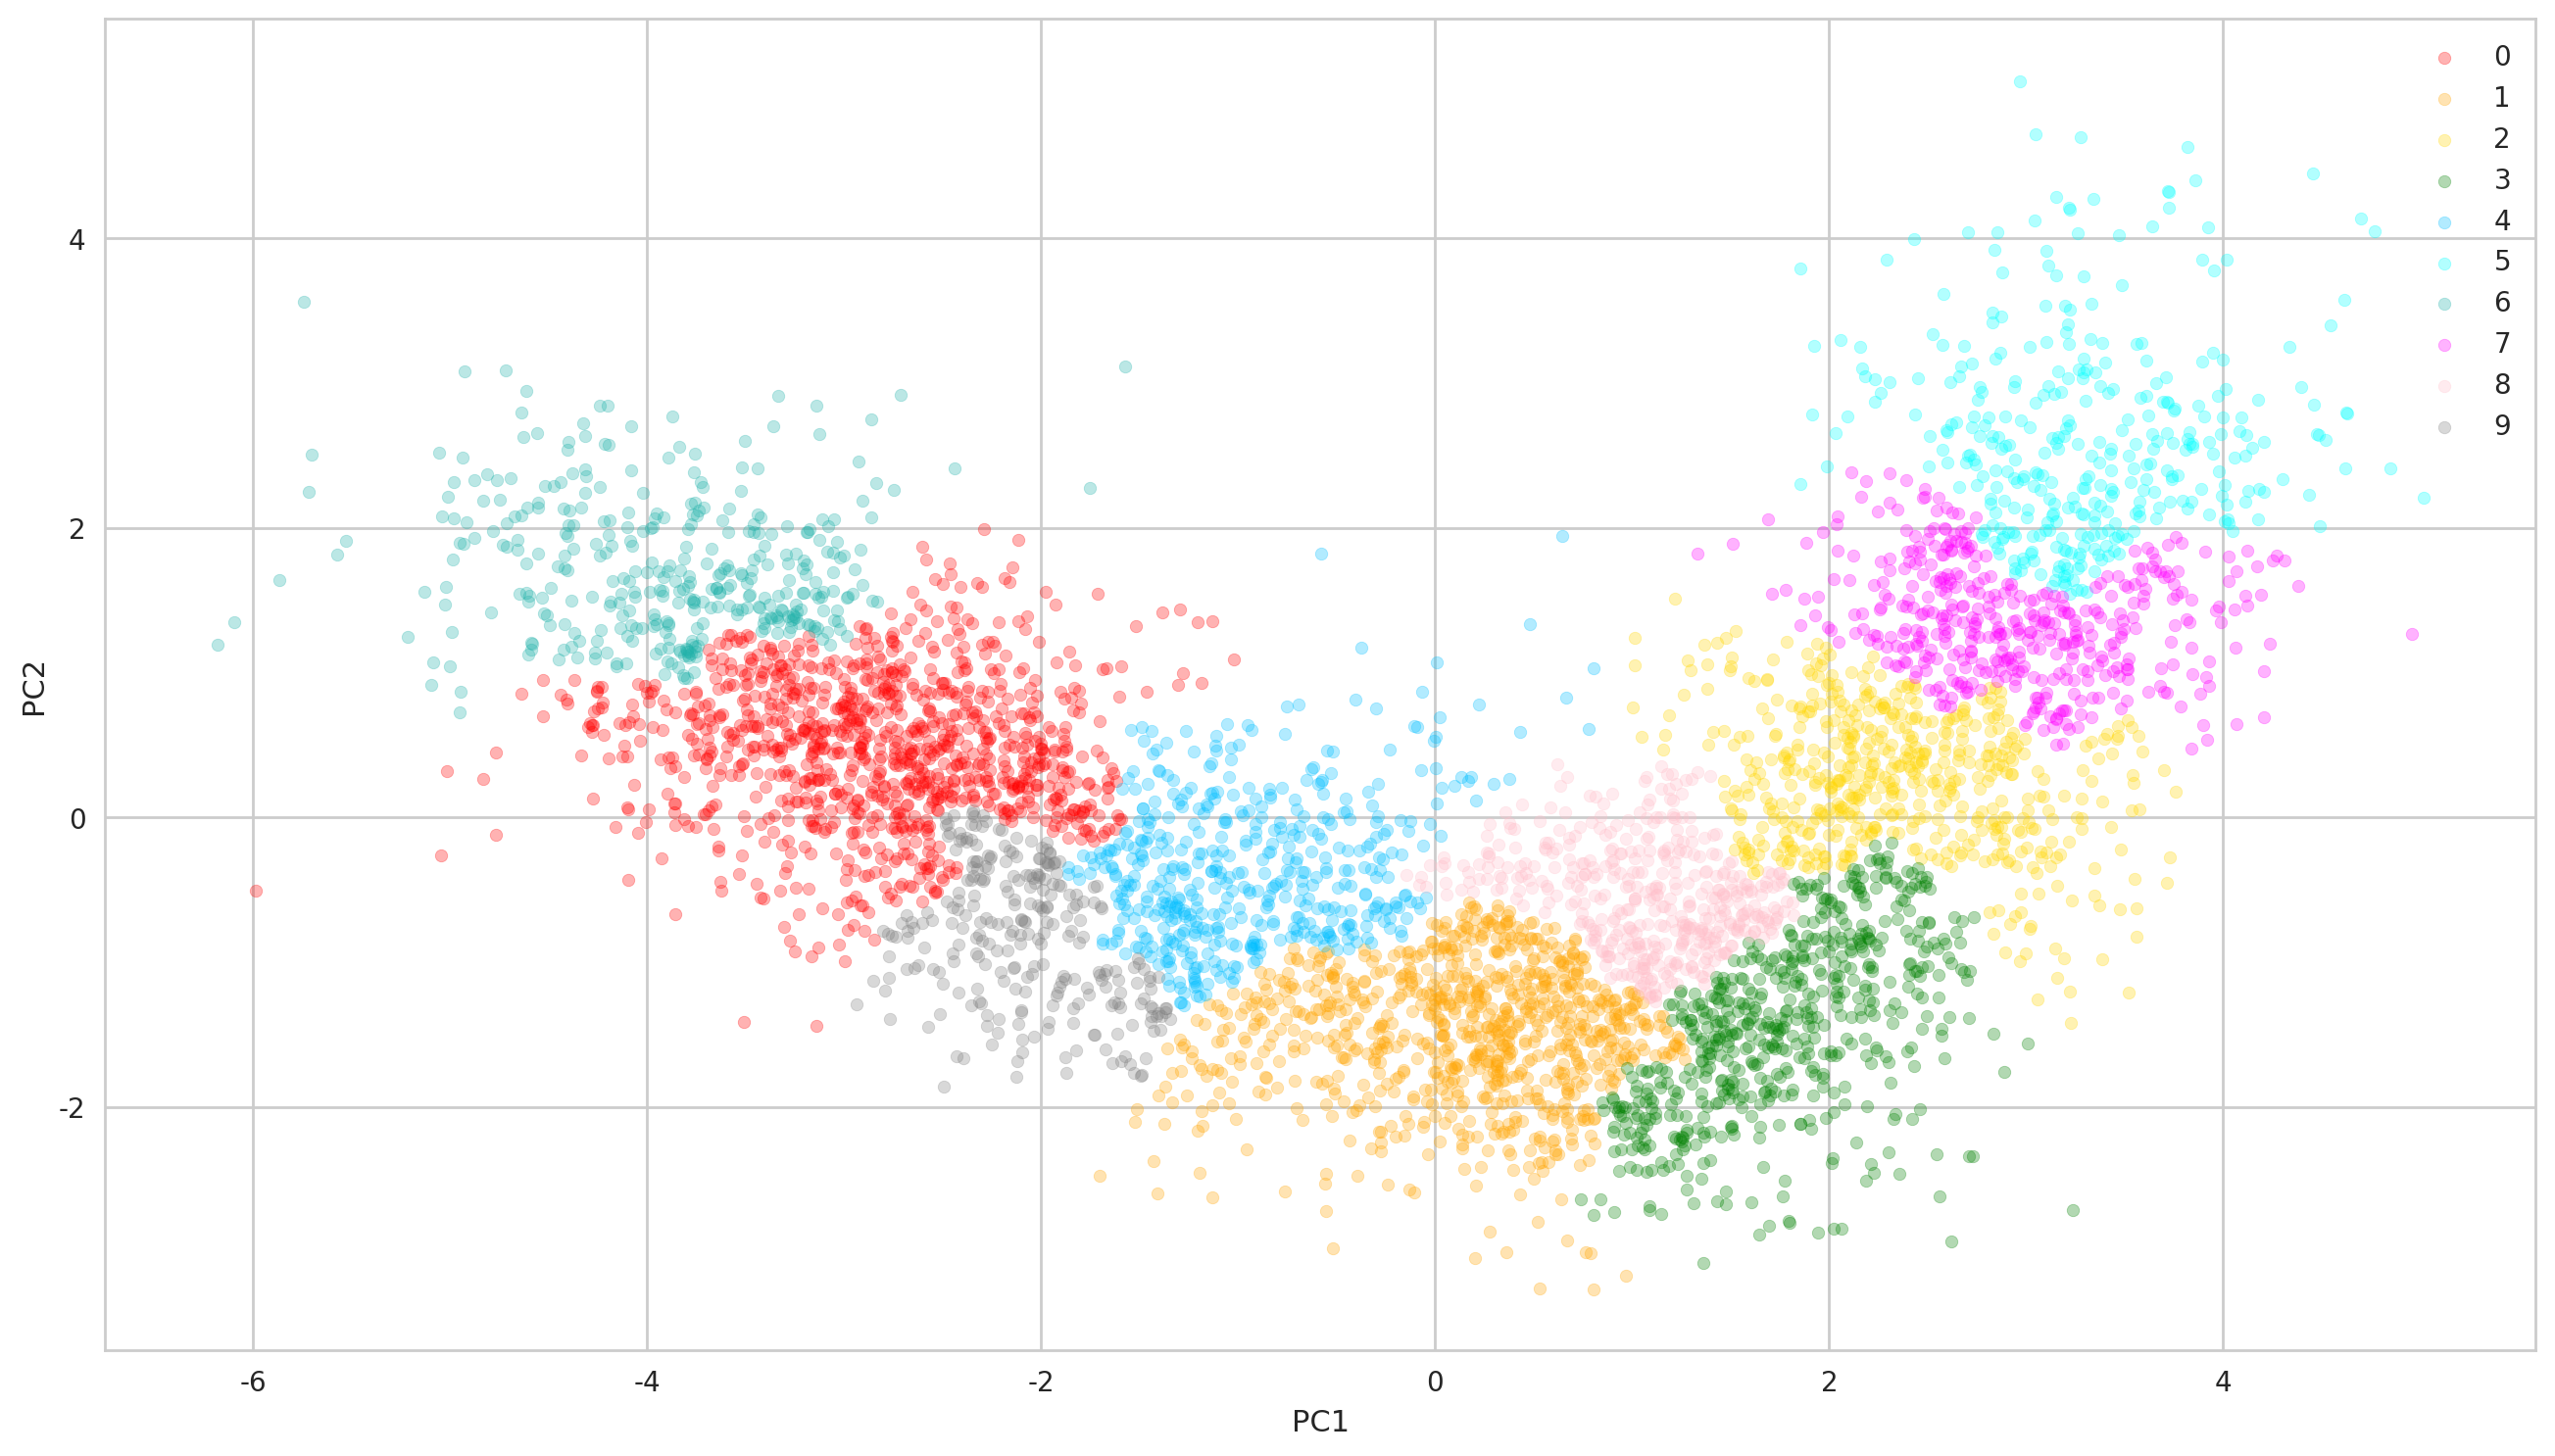

In [215]:
position_plot(ldaDf, 10)

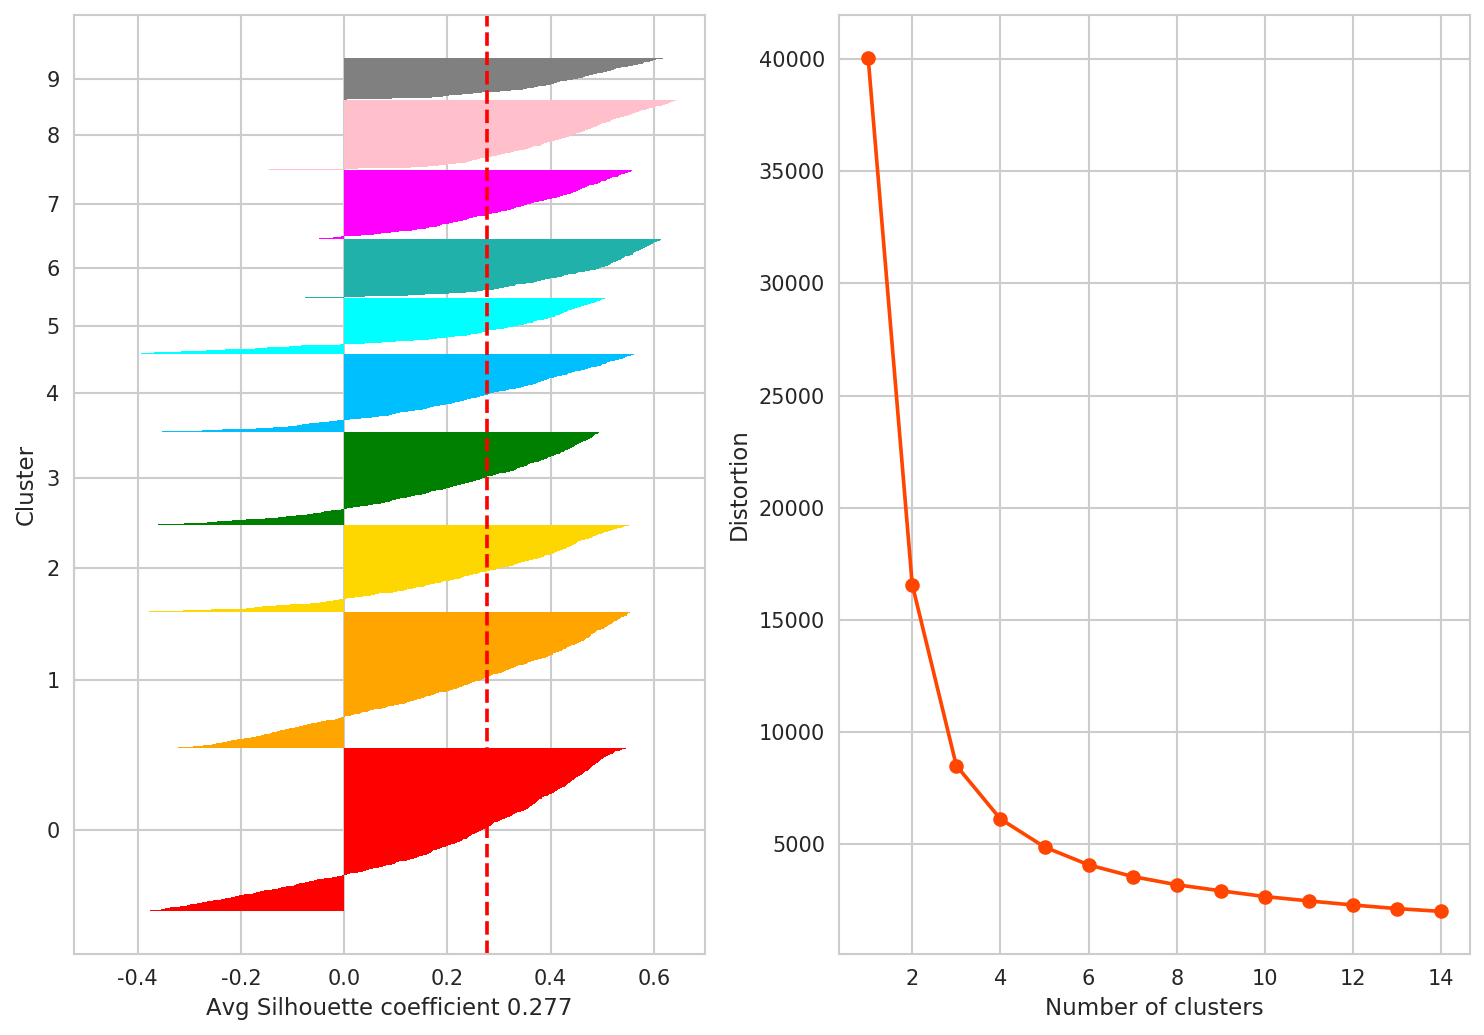

In [216]:
silhouette_plot(ldaDf.iloc[:,:2], ldaDf["cluster"])

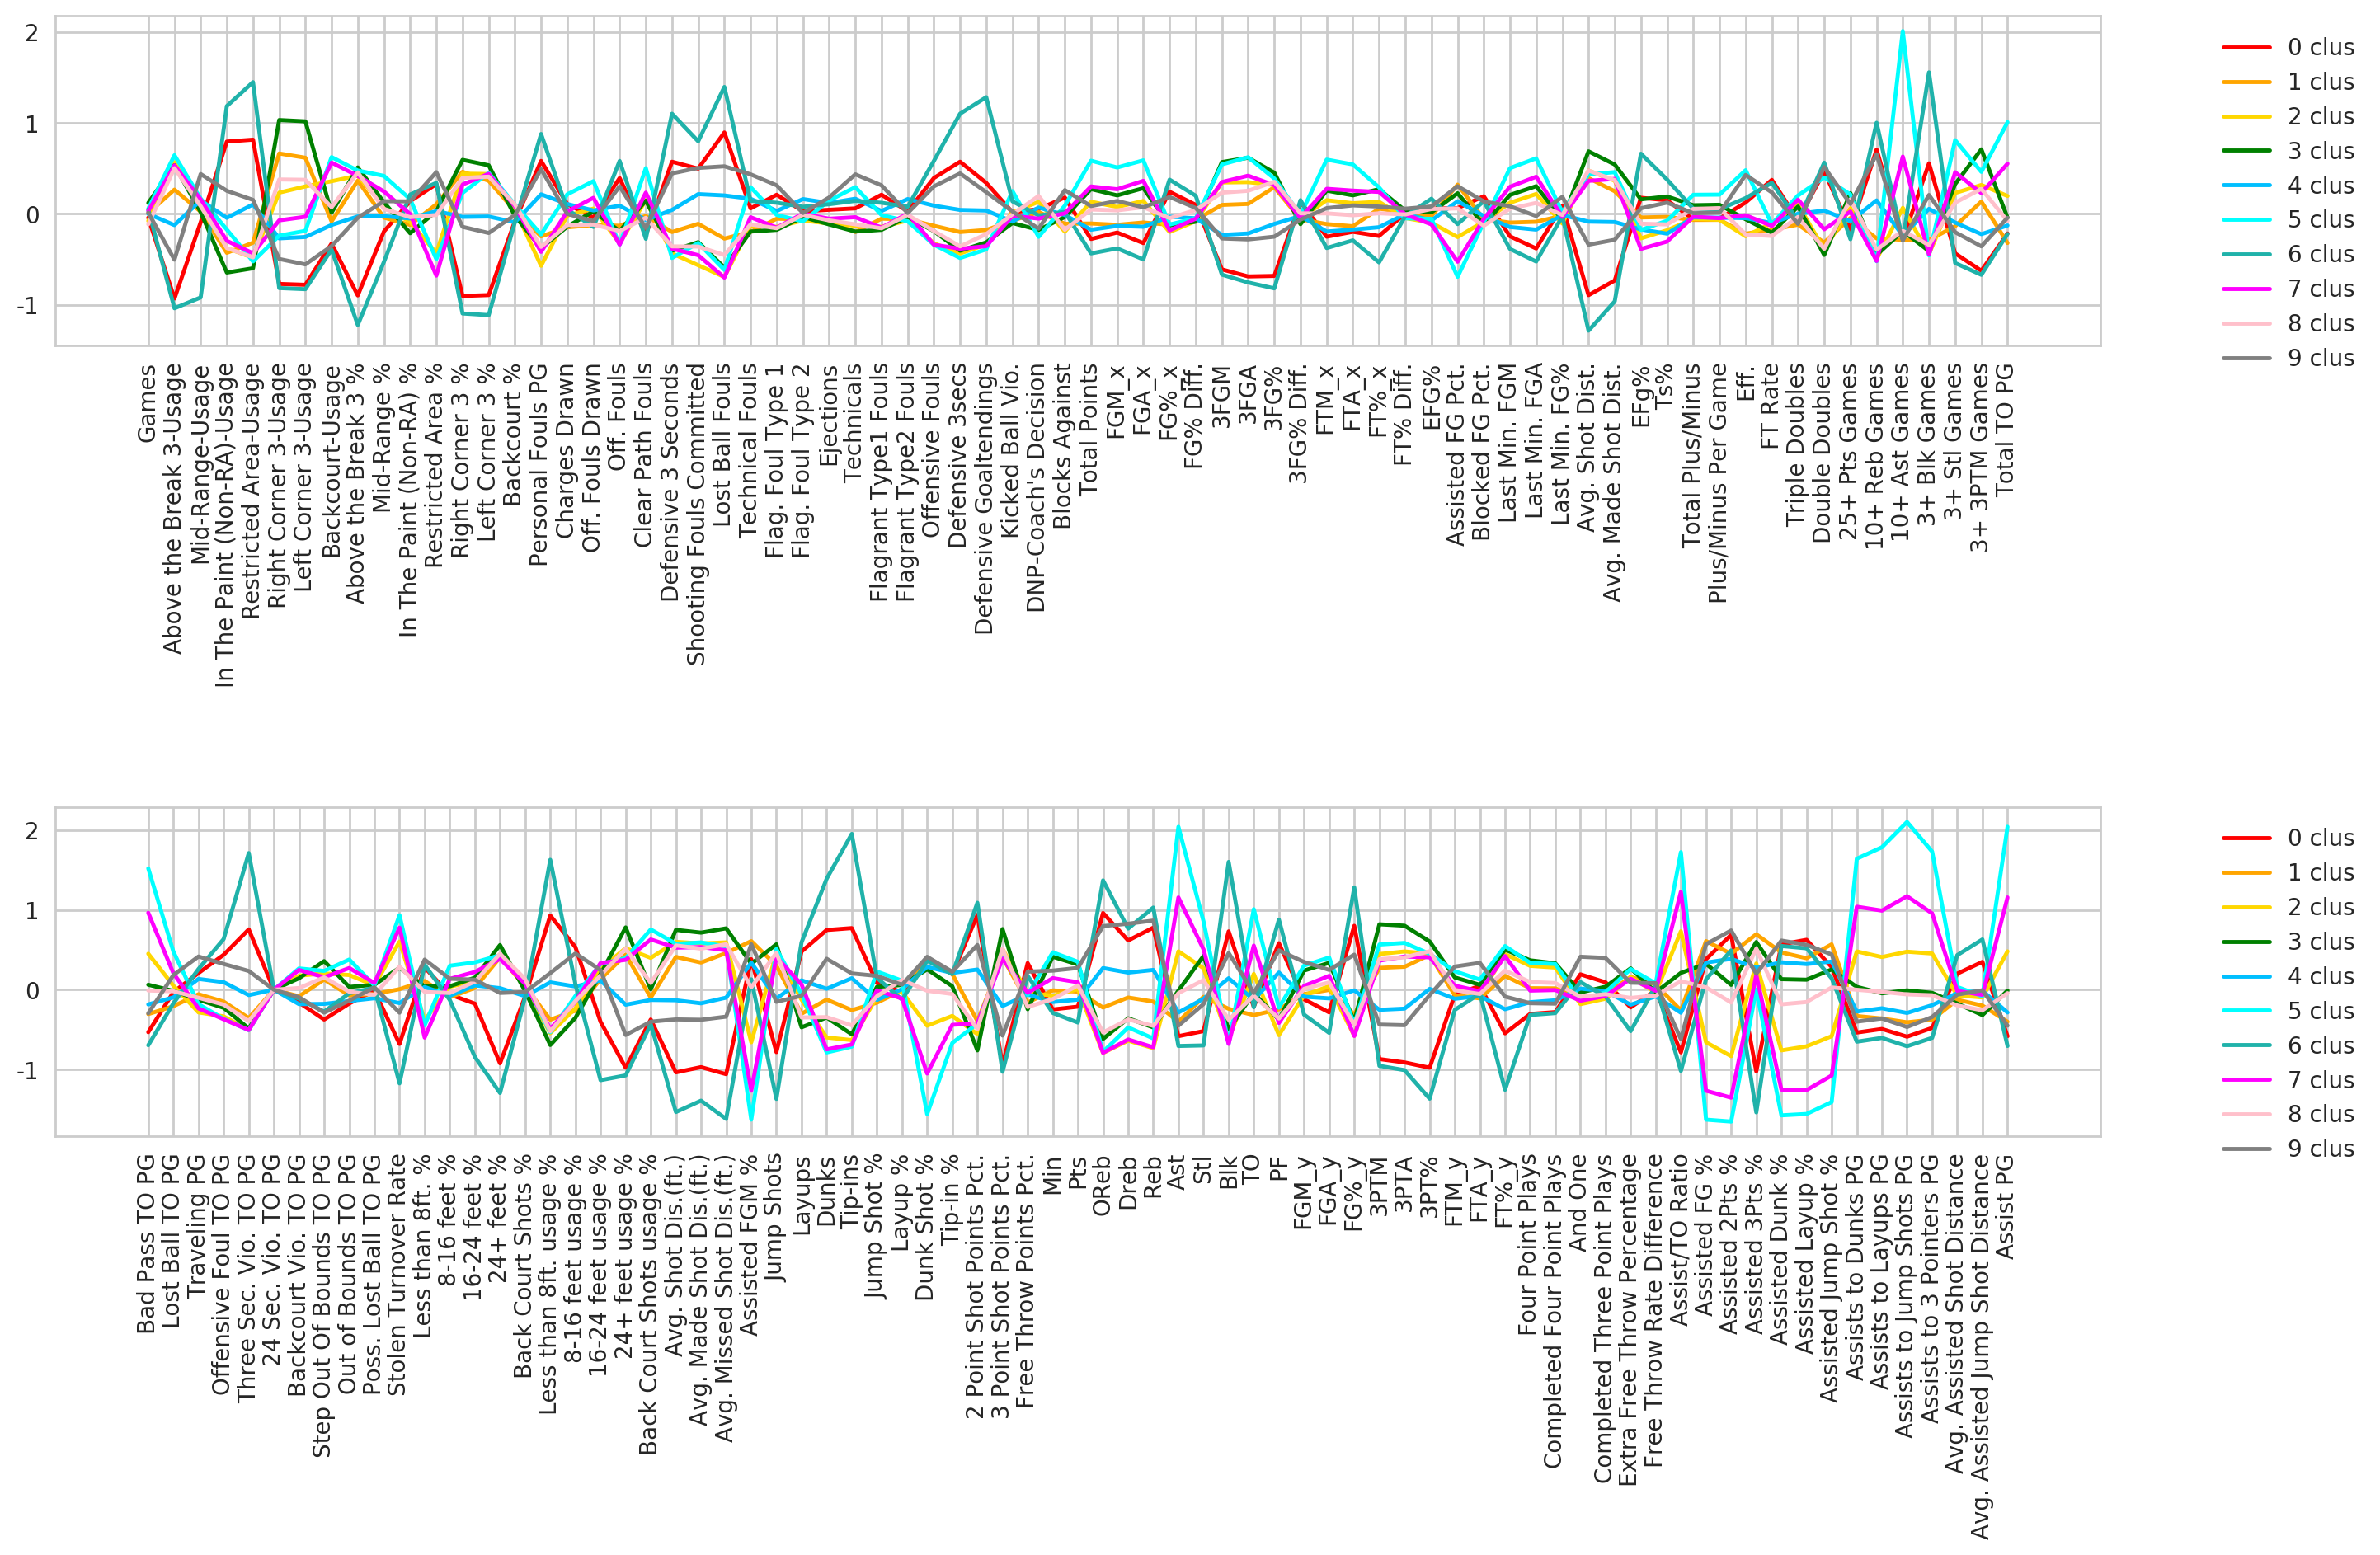

In [217]:
dfX["cluster"] = ldaDf["cluster"]
cluster_plot(dfX, 10)